# **SOURCE**
https://www.kaggle.com/code/nkitgupta/who-will-leave-a-job/notebook

Features
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

In [2]:
pathTrain = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/hr-analytics-who-will-leave-the-job/aug_train.csv'
pathTest = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/hr-analytics-who-will-leave-the-job/aug_test.csv'

data = pd.read_csv(pathTrain)
dataTesting = pd.read_csv(pathTest)

In [3]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
dataTesting

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [5]:
dtype = data.dtypes
missingValue = data.isnull().sum()
missingValuePercent = round(missingValue/len(data)*100, 0)
memoryUsage = data.memory_usage(deep=True)
columns={
    0:'missing_value',
    1:'missing_value_percentage',
    2:'memory_usage_bytes',
    3:'dtype'}

print(f'Dataset dimensions\t: {data.shape}')
print(f'Rows duplicated\t\t: {data.duplicated().sum()}')

infoData = pd.concat([missingValue, missingValuePercent, memoryUsage, dtype], axis=1)
# infoData.rename(columns=columns)
infoData.drop(index='Index').rename(columns=columns)
# memoryUsage

Dataset dimensions	: (19158, 14)
Rows duplicated		: 0


,missing_value,missing_value_percentage,memory_usage_bytes,dtype
enrollee_id,0.0,0.0,153264,int64
city,0.0,0.0,1235888,object
city_development_index,0.0,0.0,153264,float64
gender,4508.0,24.0,1040573,object
relevent_experience,0.0,0.0,1527274,object
enrolled_university,386.0,2.0,1341257,object
education_level,460.0,2.0,1231558,object
major_discipline,2813.0,15.0,1095945,object
experience,65.0,0.0,1121964,object
company_size,5938.0,31.0,1023519,object


# **DATA UNDERSTANDING**

## **Numerical**

In [6]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## **Categorical**

In [7]:
data.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


#### **city**

In [8]:
city = (pd.DataFrame([data.city.value_counts(), (round(data.city.value_counts()*100/len(data.city), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'city'})
city

,city,count,percentage
0,city_103,4355.0,22.7
1,city_21,2702.0,14.1
2,city_16,1533.0,8.0
3,city_114,1336.0,7.0
4,city_160,845.0,4.4
...,...,...,...
118,city_129,3.0,0.0
119,city_111,3.0,0.0
120,city_121,3.0,0.0
121,city_140,1.0,0.0


### **gender**

In [9]:
gender = (pd.DataFrame([data.gender.value_counts(), (round(data.gender.value_counts()*100/len(data.gender), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'gender'})
gender = pd.concat([gender, pd.DataFrame([['n/a', len(data)-gender['count'].sum(), 100-gender['percentage'].sum()]], columns=gender.columns)])
gender

,gender,count,percentage
0,Male,13221.0,69.0
1,Female,1238.0,6.5
2,Other,191.0,1.0
0,n/a,4508.0,23.5


### **relevent_experience**

In [10]:
releventExperience = (pd.DataFrame([data.relevent_experience.value_counts(), 
                                   (round(data.relevent_experience.value_counts()*100/len(data.relevent_experience), 1))], index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'relevent_experience'})
releventExperience

,relevent_experience,count,percentage
0,Has relevent experience,13792.0,72.0
1,No relevent experience,5366.0,28.0


### **enrolled_university**

In [11]:
enrolledUniversity = (pd.DataFrame([data.enrolled_university.value_counts(), (round(data.enrolled_university.value_counts()*100/len(data.enrolled_university), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'enrolled_university'})
enrolledUniversity = pd.concat([enrolledUniversity, pd.DataFrame([['n/a', len(data)-enrolledUniversity['count'].sum(), 100-enrolledUniversity['percentage'].sum()]], columns=enrolledUniversity.columns)])
enrolledUniversity

,enrolled_university,count,percentage
0,no_enrollment,13817.0,72.1
1,Full time course,3757.0,19.6
2,Part time course,1198.0,6.3
0,n/a,386.0,2.0


### **education_level**

In [12]:
educationLevel = (pd.DataFrame([data.education_level.value_counts(), (round(data.education_level.value_counts()*100/len(data.education_level), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'education_level'})
educationLevel = pd.concat([educationLevel, pd.DataFrame([['n/a', len(data)-educationLevel['count'].sum(), 100-educationLevel['percentage'].sum()]], columns=educationLevel.columns)])
educationLevel

,education_level,count,percentage
0,Graduate,11598.0,60.5
1,Masters,4361.0,22.8
2,High School,2017.0,10.5
3,Phd,414.0,2.2
4,Primary School,308.0,1.6
0,n/a,460.0,2.4


### **major_discipline**

In [13]:
majorDiscipline = (pd.DataFrame([data.major_discipline.value_counts(), (round(data.major_discipline.value_counts()*100/len(data.major_discipline), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'major_discipline'})
majorDiscipline = pd.concat([majorDiscipline, pd.DataFrame([['n/a', len(data)-majorDiscipline['count'].sum(), 100-majorDiscipline['percentage'].sum()]], columns=majorDiscipline.columns)])
majorDiscipline

,major_discipline,count,percentage
0,STEM,14492.0,75.6
1,Humanities,669.0,3.5
2,Other,381.0,2.0
3,Business Degree,327.0,1.7
4,Arts,253.0,1.3
5,No Major,223.0,1.2
0,n/a,2813.0,14.7


### **experience**

In [14]:
experience = (pd.DataFrame([data.experience.value_counts(), (round(data.experience.value_counts()*100/len(data.experience), 2))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'experience'})
experience = pd.concat([experience, pd.DataFrame([['n/a', len(data)-experience['count'].sum(), 100-experience['percentage'].sum()]], columns=experience.columns)])
experience

,experience,count,percentage
0,>20,3286.0,17.15
1,5,1430.0,7.46
2,4,1403.0,7.32
3,3,1354.0,7.07
4,6,1216.0,6.35
5,2,1127.0,5.88
6,7,1028.0,5.37
7,10,985.0,5.14
8,9,980.0,5.12
9,8,802.0,4.19


### **company_size**

In [15]:
companySize = (pd.DataFrame([data.company_size.value_counts(), (round(data.company_size.value_counts()*100/len(data.company_size), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'company_size'})
companySize = pd.concat([companySize, pd.DataFrame([['n/a', len(data)-companySize['count'].sum(), 100-companySize['percentage'].sum()]], columns=companySize.columns)])
companySize

,company_size,count,percentage
0,50-99,3083.0,16.1
1,100-500,2571.0,13.4
2,10000+,2019.0,10.5
3,10/49,1471.0,7.7
4,1000-4999,1328.0,6.9
5,<10,1308.0,6.8
6,500-999,877.0,4.6
7,5000-9999,563.0,2.9
0,n/a,5938.0,31.1


### **company_type**

In [16]:
companyType = (pd.DataFrame([data.company_type.value_counts(), (round(data.company_type.value_counts()*100/len(data.company_type), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'company_type'})
companyType = pd.concat([companyType, pd.DataFrame([['n/a', len(data)-companyType['count'].sum(), 100-companyType['percentage'].sum()]], columns=companyType.columns)])
companyType

,company_type,count,percentage
0,Pvt Ltd,9817.0,51.2
1,Funded Startup,1001.0,5.2
2,Public Sector,955.0,5.0
3,Early Stage Startup,603.0,3.1
4,NGO,521.0,2.7
5,Other,121.0,0.6
0,n/a,6140.0,32.2


### **last_new_job**

In [17]:
lastNewJob = (pd.DataFrame([data.last_new_job.value_counts(), (round(data.last_new_job.value_counts()*100/len(data.last_new_job), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'last_new_job'})
lastNewJob = pd.concat([lastNewJob, pd.DataFrame([['n/a', len(data)-lastNewJob['count'].sum(), 100-lastNewJob['percentage'].sum()]], columns=lastNewJob.columns)])
lastNewJob

,last_new_job,count,percentage
0,1,8040.0,42.0
1,>4,3290.0,17.2
2,2,2900.0,15.1
3,never,2452.0,12.8
4,4,1029.0,5.4
5,3,1024.0,5.3
0,n/a,423.0,2.2


# **EXPLORATORY DATA ANALYSIS**

In [18]:
dataChurn = data[data.target == 1]
dataChurn

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0


In [50]:
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={
          'figure.figsize': (16, 9)
        })
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":16,
                                "axes.labelsize":14})

## **Null Values Investigation**

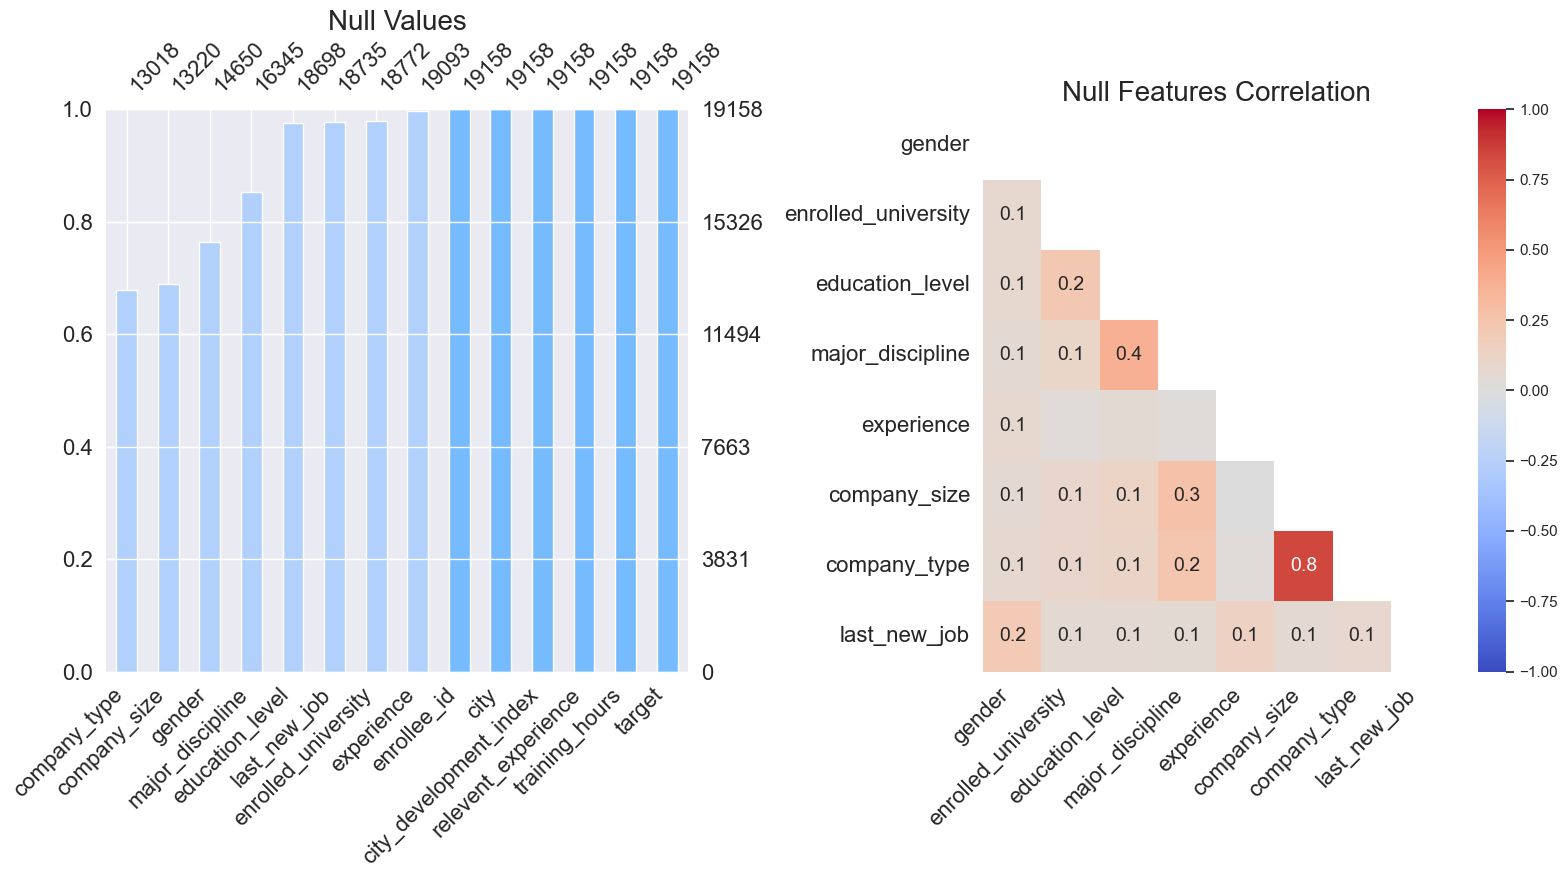

In [20]:
d = data.count().sort_values()
barpallete = ['xkcd:powder blue' if (x < max(d)) else 'xkcd:sky blue' for x in d]

f, ax = plt.subplots(1,2)
missingno.bar(data, color=barpallete, sort='ascending', ax=ax[0])
missingno.heatmap(data, cmap='coolwarm', ax=ax[1])
ax[0].set_title('Null Values')
ax[1].set_title('Null Features Correlation')
plt.tight_layout()

## **Correlation With Null Values**
Korelasi dicari menggunakan library dython berbasis feature selection ANOVA untuk menghitung korelasi antara Categorical-Numerical Features karena sebagaian besar features merupakan categorical features.

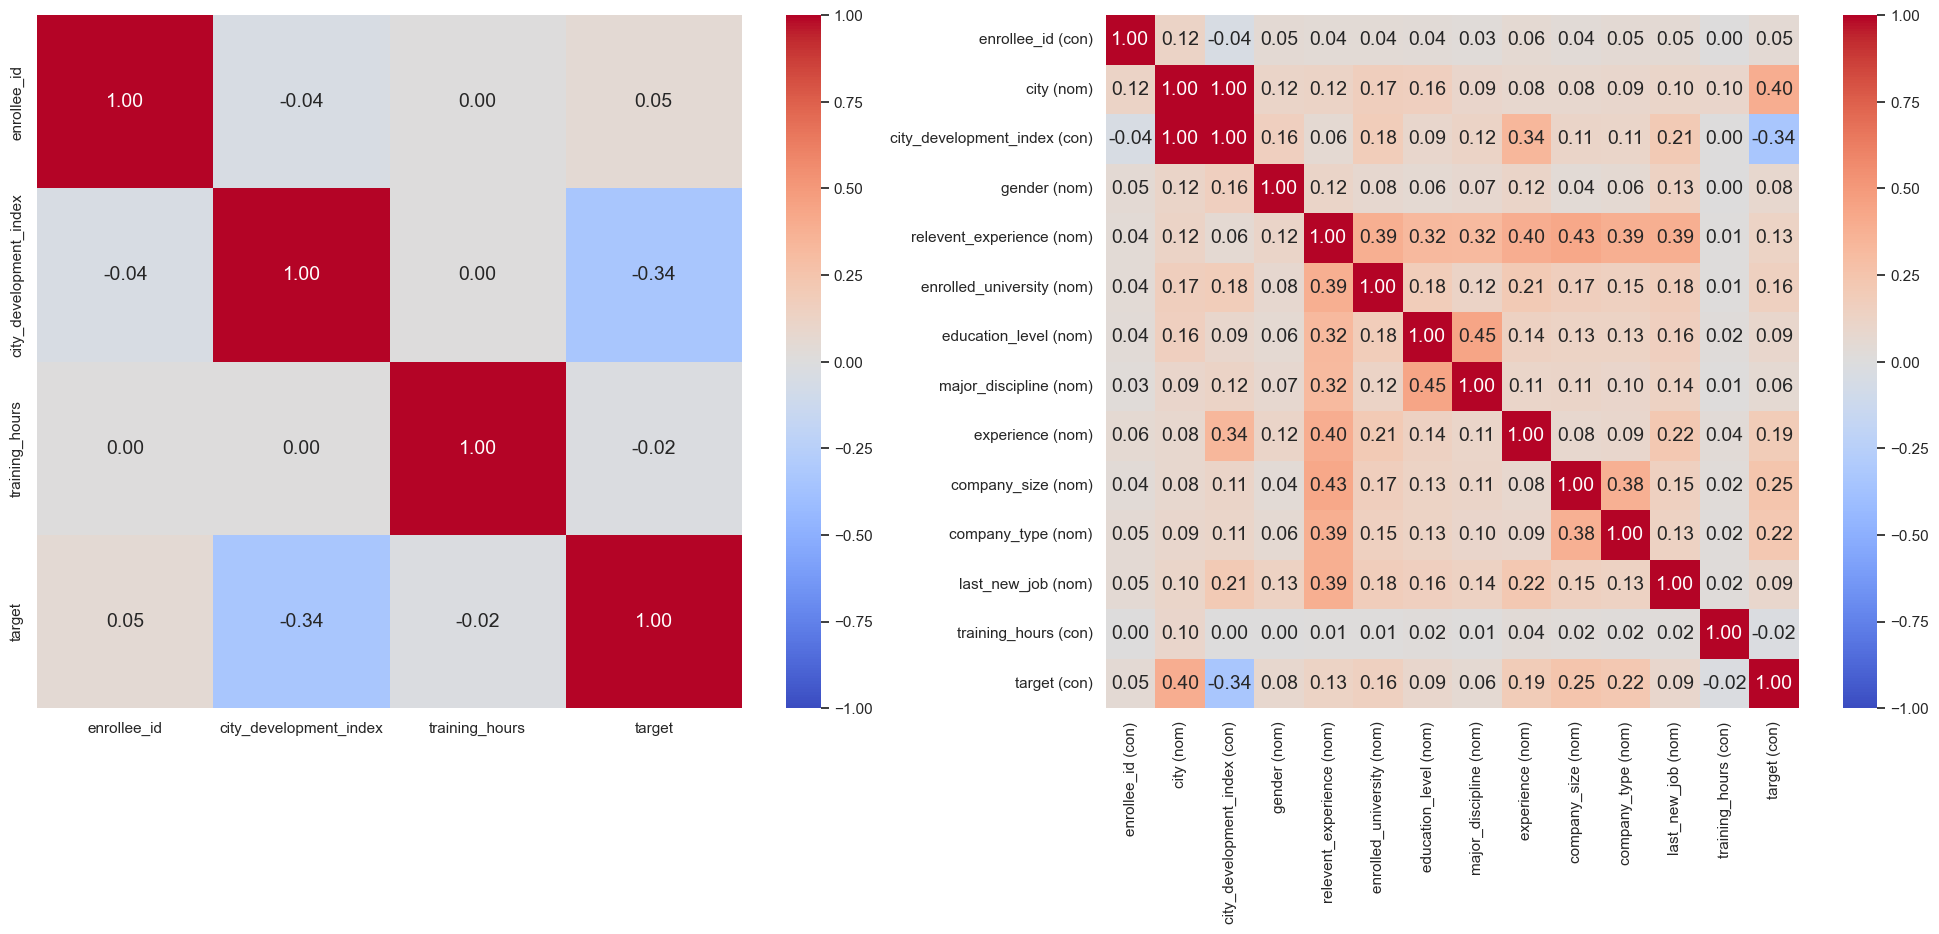

<Figure size 1600x900 with 0 Axes>

In [21]:
from dython import nominal

f, ax = plt.subplots(1,2,figsize=(25,9))
sns.heatmap(data.corr(), cmap='coolwarm', vmax=1, vmin=-1, ax=ax[0], annot=True, fmt='.2f')
nominal.associations(data, ax=ax[1], mark_columns=True, cmap='coolwarm');
plt.tight_layout()

## **Numerical**

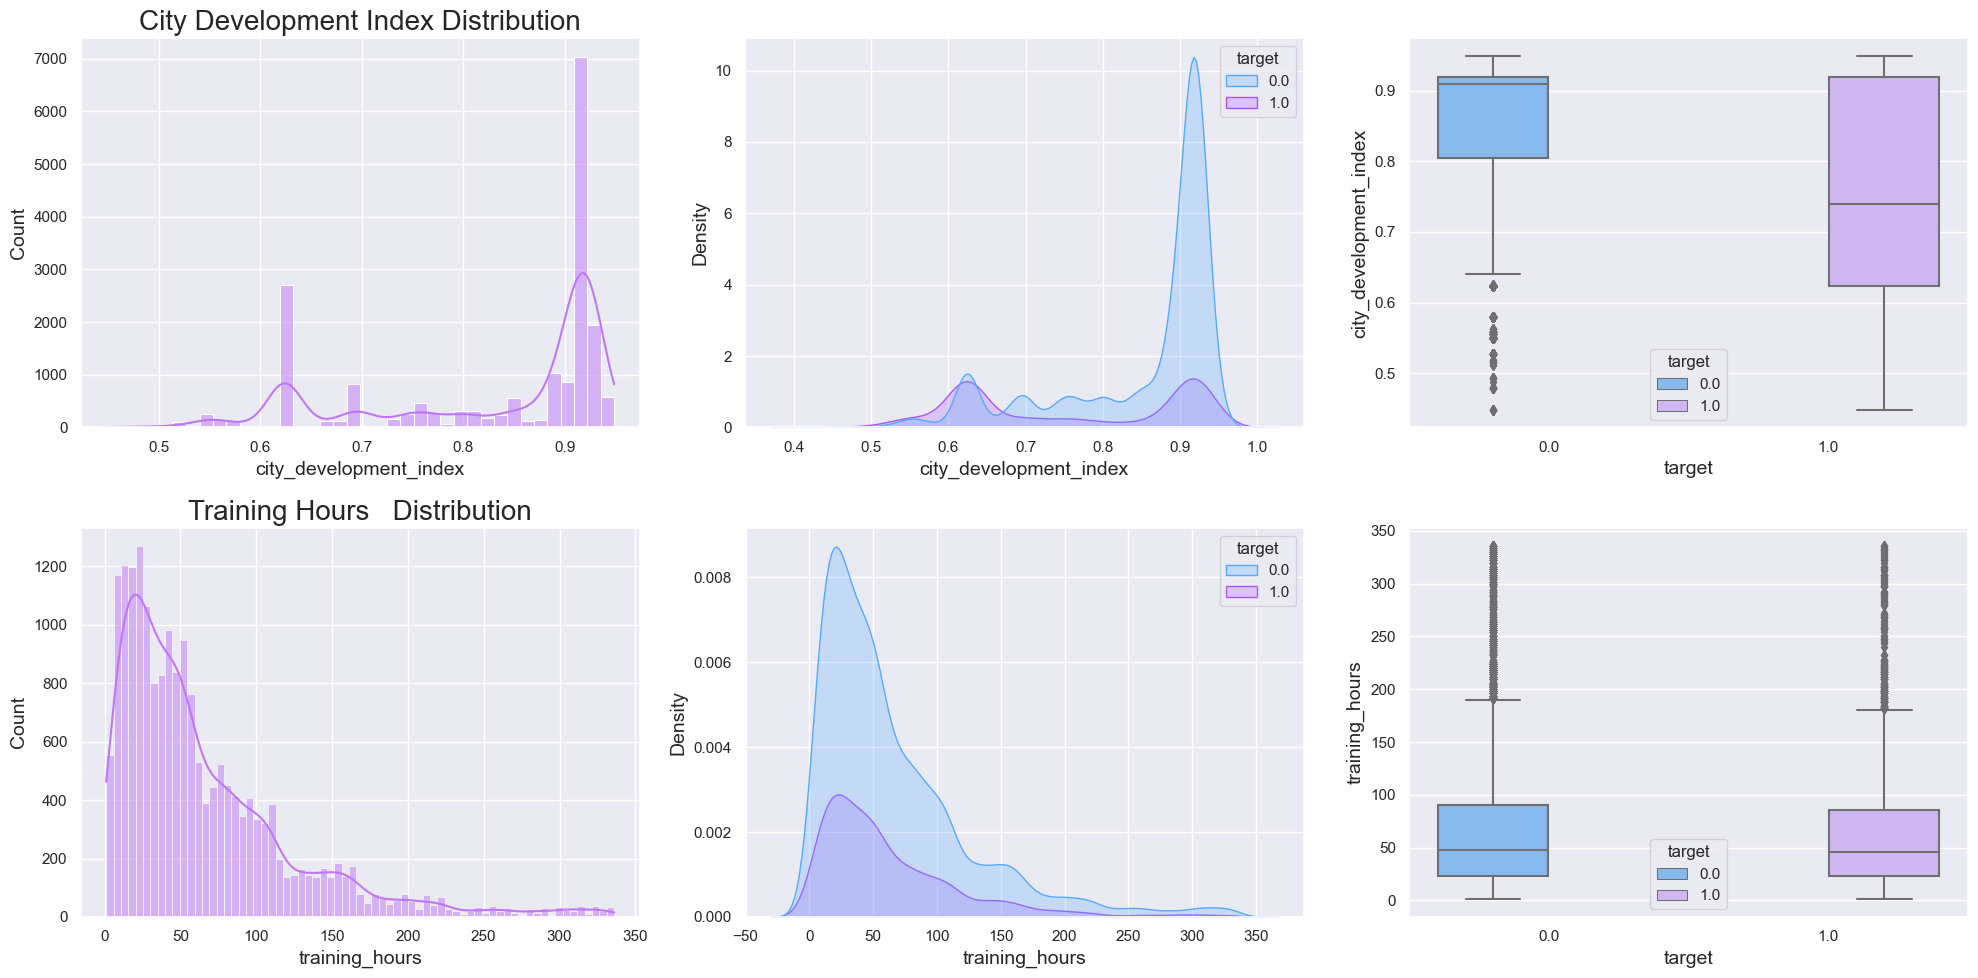

In [22]:
f, ax = plt.subplots(2,3, figsize=(20,10))
#
sns.histplot(ax=ax[0,0], data=data, x='city_development_index', kde=True, color='xkcd:light purple').set(title='City Development Index Distribution')
sns.kdeplot(ax=ax[0,1], data=data, x='city_development_index', hue='target', palette='cool', shade=True)
sns.boxplot(ax=ax[0,2], data=data, x='target', y='city_development_index', hue='target', palette=['xkcd:sky blue', 'xkcd:pale violet'])
#
sns.histplot(ax=ax[1,0], data=data, x='training_hours', kde=True, color='xkcd:light purple').set(title='Training Hours   Distribution')
sns.kdeplot(ax=ax[1,1], data=data, x='training_hours', hue='target', palette='cool', shade=True)
sns.boxplot(ax=ax[1,2], data=data, x='target', y='training_hours', hue='target', palette=['xkcd:sky blue', 'xkcd:pale violet'])
plt.tight_layout()

## **Categorical**

[(0.0, 100.0), Text(0.5, 1.0, 'Top Conversion Rate by City')]

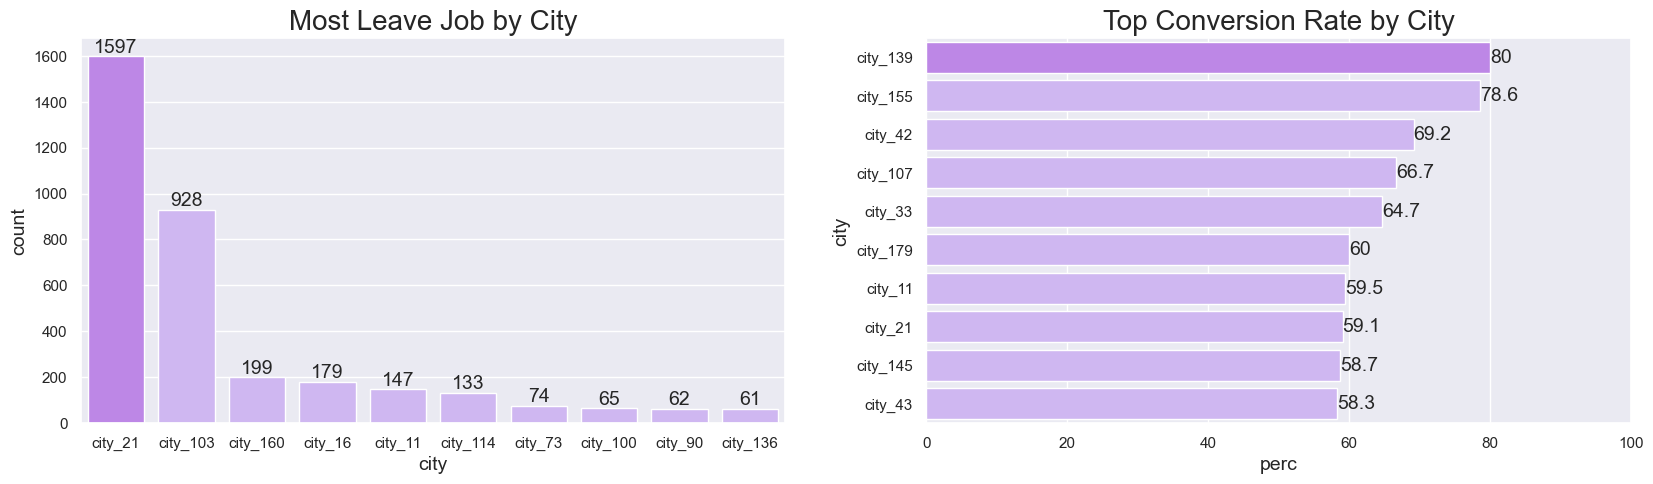

In [23]:
f, ax = plt.subplots(1,2, figsize=(20,5))

barpallete = ['xkcd:pale violet' if (x < max(dataChurn.city.value_counts().head(10))) else 'xkcd:light purple' for x in dataChurn.city.value_counts().head(10)]
d1 = data.groupby(['city','target']).city.count().unstack()
d1['perc'] = round((d1[1.0]/(d1[0.0]+d1[1.0]))*100,1)
d1 = d1.sort_values('perc', ascending=False).head(10).reset_index()
barpallete1 = ['xkcd:pale violet' if (x < max(d1.perc)) else 'xkcd:light purple' for x in d1.perc]

sns.countplot(ax=ax[0], data=dataChurn, x='city', order=dataChurn.city.value_counts().head(10).index, palette=barpallete).set(title='Most Leave Job by City')
sns.barplot(ax=ax[1], data=d1, y='city', x='perc', palette=barpallete1)
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
ax[1].set(xlim=[0, 100], title='Top Conversion Rate by City')

In [24]:
dataDummy = data.copy()
dataDummy.gender = dataDummy.gender.fillna('n/a')
dataDummy.relevent_experience = dataDummy.relevent_experience.fillna('n/a')
dataDummy.enrolled_university = dataDummy.enrolled_university.fillna('n/a')
dataDummy.education_level = dataDummy.education_level.fillna('n/a')
dataDummy.major_discipline = dataDummy.major_discipline.fillna('n/a')
dataDummy.experience = dataDummy.experience.fillna('n/a')
dataDummy.company_size = dataDummy.company_size.fillna('n/a')
dataDummy.company_type = dataDummy.company_type.fillna('n/a')
dataDummy.last_new_job = dataDummy.last_new_job.fillna('n/a')

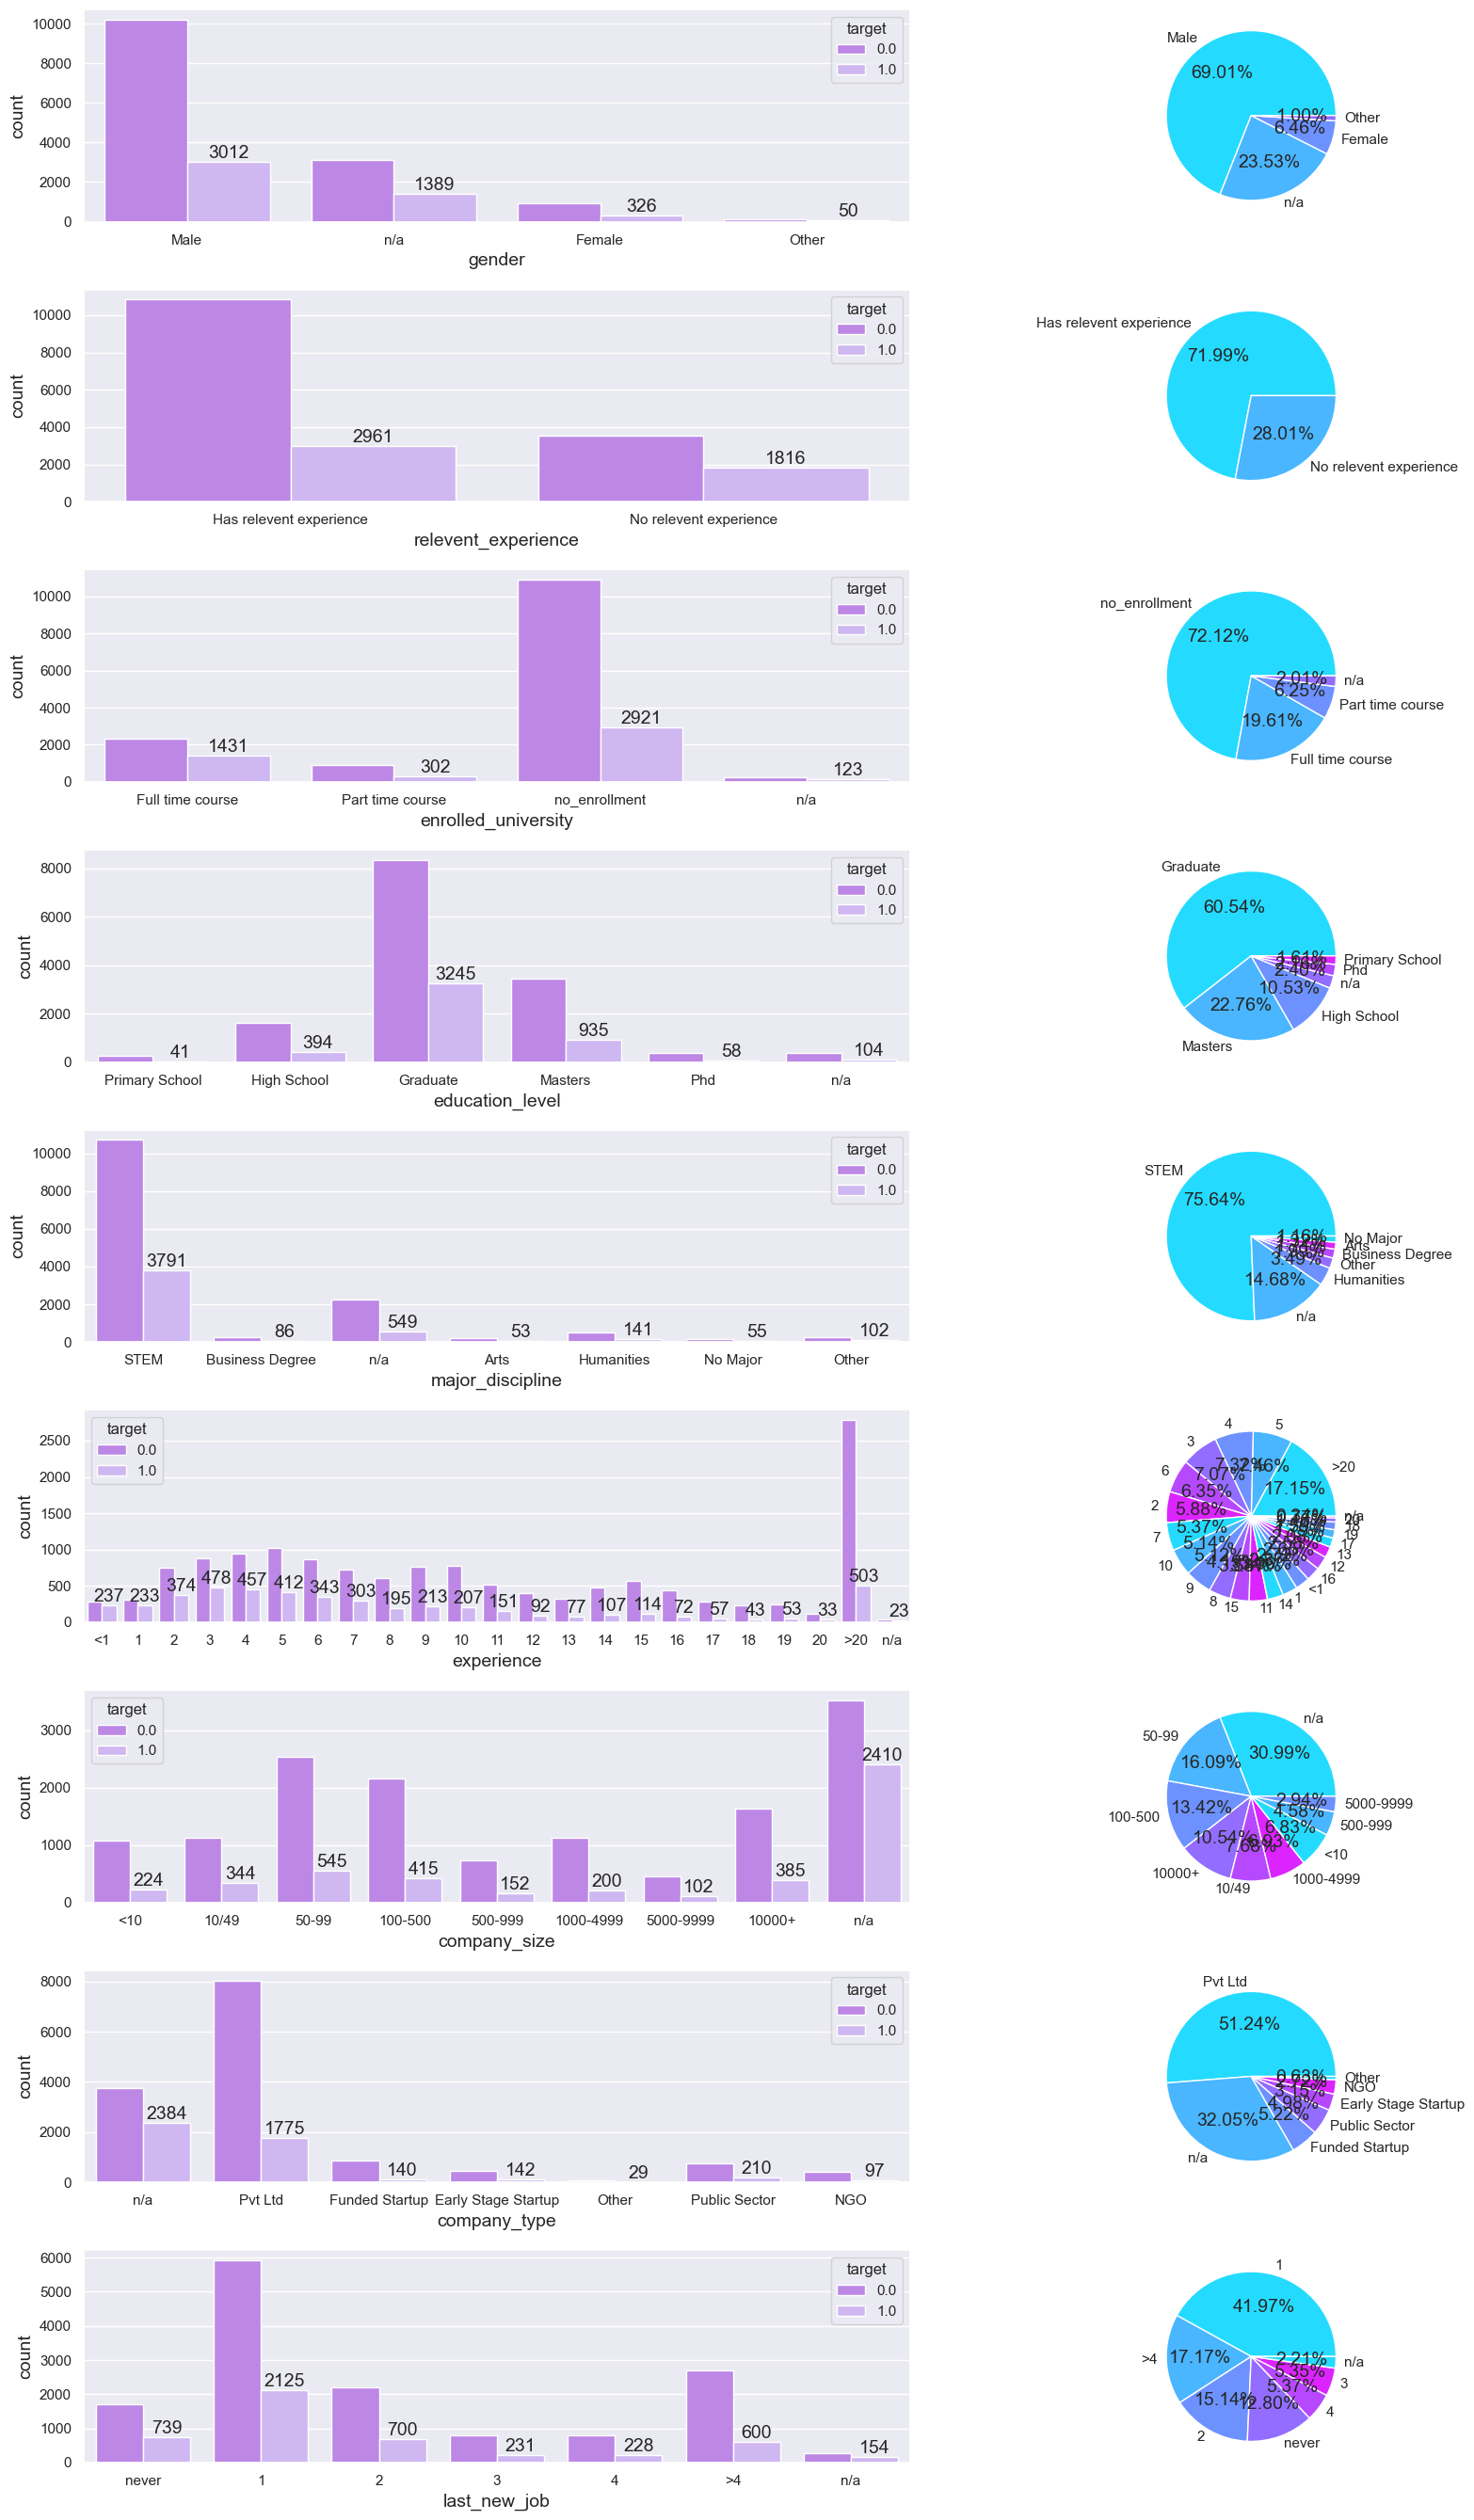

In [25]:
f, ax = plt.subplots(9,2, figsize=(18,27))
#
sns.countplot(ax=ax[0,0], data=dataDummy, x='gender', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(0,1))
plt.pie(dataDummy.gender.value_counts().values, labels=dataDummy.gender.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[0,0].bar_label(ax[0,0].containers[0])
ax[0,0].bar_label(ax[0,0].containers[1])
#
sns.countplot(ax=ax[1,0], data=dataDummy, x='relevent_experience', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(1,1))
plt.pie(dataDummy.relevent_experience.value_counts().values, labels=dataDummy.relevent_experience.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[1,0].bar_label(ax[1,0].containers[0])
ax[1,0].bar_label(ax[1,0].containers[1])
#
sns.countplot(ax=ax[2,0], data=dataDummy, x='enrolled_university', hue='target', palette=['xkcd:light purple','xkcd:pale violet'],
              order=['Full time course', 'Part time course', 'no_enrollment', 'n/a'])
plt.subplot2grid((9,2),(2,1))
plt.pie(dataDummy.enrolled_university.value_counts().values, labels=dataDummy.enrolled_university.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[2,0].bar_label(ax[2,0].containers[0])
ax[2,0].bar_label(ax[2,0].containers[1])
#
sns.countplot(ax=ax[3,0], data=dataDummy, x='education_level', hue='target', palette=['xkcd:light purple','xkcd:pale violet'],
              order=['Primary School','High School','Graduate','Masters','Phd','n/a'])
plt.subplot2grid((9,2),(3,1))
plt.pie(dataDummy.education_level.value_counts().values, labels=dataDummy.education_level.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[3,0].bar_label(ax[3,0].containers[0])
ax[3,0].bar_label(ax[3,0].containers[1])
#
sns.countplot(ax=ax[4,0], data=dataDummy, x='major_discipline', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(4,1))
plt.pie(dataDummy.major_discipline.value_counts().values, labels=dataDummy.major_discipline.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[4,0].bar_label(ax[4,0].containers[0])
ax[4,0].bar_label(ax[4,0].containers[1])
#
sns.countplot(ax=ax[5,0], data=dataDummy, x='experience', hue='target', palette=['xkcd:light purple','xkcd:pale violet'],
              order=['<1', '1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16', '17', '18', '19', '20', '>20', 'n/a'])
plt.subplot2grid((9,2),(5,1))
plt.pie(dataDummy.experience.value_counts().values, labels=dataDummy.experience.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[5,0].bar_label(ax[5,0].containers[0])
ax[5,0].bar_label(ax[5,0].containers[1])
#
sns.countplot(ax=ax[6,0], data=dataDummy, x='company_size', hue='target', palette=['xkcd:light purple','xkcd:pale violet'],
              order=['<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+','n/a'])
plt.subplot2grid((9,2),(6,1))
plt.pie(dataDummy.company_size.value_counts().values, labels=dataDummy.company_size.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[6,0].bar_label(ax[6,0].containers[0])
ax[6,0].bar_label(ax[6,0].containers[1])
#
sns.countplot(ax=ax[7,0], data=dataDummy, x='company_type', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(7,1))
plt.pie(dataDummy.company_type.value_counts().values, labels=dataDummy.company_type.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[7,0].bar_label(ax[7,0].containers[0])
ax[7,0].bar_label(ax[7,0].containers[1])
#
sns.countplot(ax=ax[8,0], data=dataDummy, x='last_new_job', hue='target', palette=['xkcd:light purple','xkcd:pale violet'],
              order=['never', '1', '2', '3', '4', '>4', 'n/a'])
plt.subplot2grid((9,2),(8,1))
plt.pie(dataDummy.last_new_job.value_counts().values, labels=dataDummy.last_new_job.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[8,0].bar_label(ax[8,0].containers[0])
ax[8,0].bar_label(ax[8,0].containers[1])

plt.tight_layout()

# **DATA PREPROCESSING**

## **Data Cleansing**

In [26]:
dataPre = data.copy()
dataPre.rename(columns={'relevent_experience': 'relevant_experience'}, inplace=True)
dataPre.drop(['enrollee_id'], axis=1, inplace=True)

In [27]:
def toCleanString(df, cols): 
  for value in cols:
    df[value] = df[value].str.replace('_', '').str.replace(' ', '').str.lower()
  return df

In [28]:
catColumns = [x for x in dataPre.columns if dataPre[x].dtype == 'object']
dataPre = toCleanString(dataPre, catColumns)
dataPre.company_size = np.where(dataPre.company_size=='10/49', '10-49', np.where(dataPre.company_size=='10000+', '>10000', dataPre.company_size))

In [29]:
dataPre

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city103,0.920,male,hasreleventexperience,noenrollment,graduate,stem,>20,NaN,NaN,1,36,1.0
1,city40,0.776,male,noreleventexperience,noenrollment,graduate,stem,15,50-99,pvtltd,>4,47,0.0
2,city21,0.624,NaN,noreleventexperience,fulltimecourse,graduate,stem,5,NaN,NaN,never,83,0.0
3,city115,0.789,NaN,noreleventexperience,NaN,graduate,businessdegree,<1,NaN,pvtltd,never,52,1.0
4,city162,0.767,male,hasreleventexperience,noenrollment,masters,stem,>20,50-99,fundedstartup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city173,0.878,male,noreleventexperience,noenrollment,graduate,humanities,14,NaN,NaN,1,42,1.0
19154,city103,0.920,male,hasreleventexperience,noenrollment,graduate,stem,14,NaN,NaN,4,52,1.0
19155,city103,0.920,male,hasreleventexperience,noenrollment,graduate,stem,>20,50-99,pvtltd,4,44,0.0
19156,city65,0.802,male,hasreleventexperience,noenrollment,highschool,NaN,<1,500-999,pvtltd,2,97,0.0


## **Feature Encoding - Label Encoding**

In [30]:
labelColumns = []
oheColumns = []
for value in catColumns:
  if value in ['city', 'gender', 'major_discipline', 'company_type']:
    oheColumns.append(value)
  else: labelColumns.append(value)

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import OrdinalEncoder

def toOhe(data, cols):
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  ohe.fit(data[cols])
  dfOhe = pd.DataFrame(ohe.transform(data[cols]), columns=ohe.get_feature_names_out())
  data = pd.concat([data.reset_index(drop=True), dfOhe], axis=1).drop(columns=cols)
  return data

def toOrdinalEncoding(data, cols, mapping):
  oe = OrdinalEncoder(cols=cols, mapping=mapping, handle_missing='value', handle_unknown='return_nan')
  oe.fit(data[cols])
  dfOe = pd.DataFrame(oe.transform(data[cols]), columns=oe.get_feature_names())
  data = data.drop(columns=cols)
  data = pd.concat([data.reset_index(drop=True), dfOe.reset_index(drop=True)], axis=1)
  return data

def toLabelEncoding(data, cols):
  for value in cols:
    data[value] = LabelEncoder().fit_transform(data[value])
  return data

mappingLabel = [{
    'col': 'relevant_experience', 
    'mapping': {
      'noreleventexperience': 0, 
      'hasreleventexperience': 1 
  }}, {
    'col': 'enrolled_university', 
    'mapping': {
      'noenrollment': 0,
      'parttimecourse': 1,
      'fulltimecourse': 2
  }}, {
    'col': 'education_level', 
    'mapping': {
      'primaryschool': 0,
      'highschool': 1,
      'graduate': 2,
      'masters': 3,
      'phd': 4
  }}, {
    'col': 'experience', 
    'mapping': {
      '<1': 0, '1': 1, '2': 2, '3': 3,'4': 4,
      '5': 5, '6': 6, '7': 7, '8': 8,'9': 9,
      '10': 10, '11': 11, '12': 12, '13': 13,'14': 14,
      '15': 15, '16': 16, '17': 17, '18': 18,'19': 19,'20': 20,'>20':21
  }}, {
    'col': 'company_size', 
    'mapping': {
      '<10': 0,
      '10-49': 1,
      '50-99': 2,
      '100-500': 3,
      '500-999': 4,
      '1000-4999': 5,
      '5000-9999': 6,
      '>10000': 7
  }}, {
    'col': 'last_new_job', 
    'mapping': {
      'never': 0,
      '1': 1,
      '2': 2,
      '3': 3,
      '4': 4,
      '>4': 5
  }}]

In [32]:
#label encoding
dataPre = toOrdinalEncoding(dataPre, catColumns, mappingLabel)
# dataPre = toLabelEncoding(dataPre, ['city'])

#one-hot encoding nnti setelah missing values
## label encoding sementara untuk handle missing value setelah itu akan di-inverse untuk OHE
leCity = LabelEncoder()
leGender = LabelEncoder()
leMajorDiscipline = LabelEncoder()
leCompanyType = LabelEncoder()
dataPre.city = leCity.fit_transform(dataPre.city)
dataPre.gender = leGender.fit_transform(dataPre.gender) 
dataPre.major_discipline = leMajorDiscipline.fit_transform(dataPre.major_discipline) 
dataPre.company_type = leCompanyType.fit_transform(dataPre.company_type)
## label to nan
dataPre.gender = np.where(dataPre.gender==len(leGender.classes_)-1, np.nan, dataPre.gender)
dataPre.city = np.where(dataPre.city==len(leCity.classes_)-1, np.nan, dataPre.city)
dataPre.major_discipline = np.where(dataPre.major_discipline==len(leMajorDiscipline.classes_)-1, np.nan, dataPre.major_discipline)
dataPre.company_type = np.where(dataPre.company_type==len(leCompanyType.classes_)-1, np.nan, dataPre.company_type)

In [33]:
dataPre

,city_development_index,training_hours,target,city,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,0.920,36,1.0,5.0,1.0,1,0.0,2.0,5.0,21.0,NaN,NaN,1.0
1,0.776,47,0.0,77.0,1.0,0,0.0,2.0,5.0,15.0,2.0,5.0,5.0
2,0.624,83,0.0,64.0,NaN,0,2.0,2.0,5.0,5.0,NaN,NaN,0.0
3,0.789,52,1.0,14.0,NaN,0,NaN,2.0,1.0,0.0,NaN,5.0,0.0
4,0.767,8,0.0,50.0,1.0,1,0.0,3.0,5.0,21.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,1.0,55.0,1.0,0,0.0,2.0,2.0,14.0,NaN,NaN,1.0
19154,0.920,52,1.0,5.0,1.0,1,0.0,2.0,5.0,14.0,NaN,NaN,4.0
19155,0.920,44,0.0,5.0,1.0,1,0.0,2.0,5.0,21.0,2.0,5.0,4.0
19156,0.802,97,0.0,94.0,1.0,1,0.0,1.0,NaN,0.0,4.0,5.0,2.0


## **Handle Missing Value For Categorical**

In [34]:
from sklearn.impute import KNNImputer

numOfNeighbors = 3
knnImputer = KNNImputer(n_neighbors=numOfNeighbors)

In [35]:
numericalColumns = ['city_development_index','training_hours','target']
dataCategorical = dataPre[[x for x in dataPre.columns if x not in numericalColumns]]
dataCategoricalNonMissing = knnImputer.fit_transform(dataCategorical)
dataPreCategoricalNonMissing = pd.DataFrame(np.intc(np.round(dataCategoricalNonMissing)), columns=dataCategorical.columns)
dataPreNonMissing = pd.concat([dataPre[numericalColumns], dataPreCategoricalNonMissing], axis=1)
dataPreNonMissing

,city_development_index,training_hours,target,city,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,0.920,36,1.0,5,1,1,0,2,5,21,2,2,1
1,0.776,47,0.0,77,1,0,0,2,5,15,2,5,5
2,0.624,83,0.0,64,1,0,2,2,5,5,0,3,0
3,0.789,52,1.0,14,1,0,1,2,1,0,2,5,0
4,0.767,8,0.0,50,1,1,0,3,5,21,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,1.0,55,1,0,0,2,2,14,3,4,1
19154,0.920,52,1.0,5,1,1,0,2,5,14,4,5,4
19155,0.920,44,0.0,5,1,1,0,2,5,21,2,5,4
19156,0.802,97,0.0,94,1,1,0,1,4,0,4,5,2


## **Feature Encoding - OHE**

In [36]:
dataPreNonMissing.city = leCity.inverse_transform(dataPreNonMissing.city)
dataPreNonMissing.gender = leGender.inverse_transform(dataPreNonMissing.gender)
dataPreNonMissing.major_discipline = leMajorDiscipline.inverse_transform(dataPreNonMissing.major_discipline)
dataPreNonMissing.company_type = leCompanyType.inverse_transform(dataPreNonMissing.company_type)

In [37]:
print('NULL VALUES:')
print(dataPreNonMissing.isnull().sum())
dataPreNonMissing

NULL VALUES:
city_development_index    0
training_hours            0
target                    0
city                      0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
dtype: int64


,city_development_index,training_hours,target,city,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,0.920,36,1.0,city103,male,1,0,2,stem,21,2,ngo,1
1,0.776,47,0.0,city40,male,0,0,2,stem,15,2,pvtltd,5
2,0.624,83,0.0,city21,male,0,2,2,stem,5,0,other,0
3,0.789,52,1.0,city115,male,0,1,2,businessdegree,0,2,pvtltd,0
4,0.767,8,0.0,city162,male,1,0,3,stem,21,2,fundedstartup,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,1.0,city173,male,0,0,2,humanities,14,3,publicsector,1
19154,0.920,52,1.0,city103,male,1,0,2,stem,14,4,pvtltd,4
19155,0.920,44,0.0,city103,male,1,0,2,stem,21,2,pvtltd,4
19156,0.802,97,0.0,city65,male,1,0,1,other,0,4,pvtltd,2


In [38]:
# OHE
dataPreNonMissing = toOhe(data=dataPreNonMissing, cols=oheColumns)
dataPreNonMissing

,city_development_index,training_hours,target,relevant_experience,enrolled_university,education_level,experience,company_size,last_new_job,city_city1,...,major_discipline_humanities,major_discipline_nomajor,major_discipline_other,major_discipline_stem,company_type_earlystagestartup,company_type_fundedstartup,company_type_ngo,company_type_other,company_type_publicsector,company_type_pvtltd
0,0.920,36,1.0,1,0,2,21,2,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.776,47,0.0,0,0,2,15,2,5,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.624,83,0.0,0,2,2,5,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.789,52,1.0,0,1,2,0,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.767,8,0.0,1,0,3,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,1.0,0,0,2,14,3,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19154,0.920,52,1.0,1,0,2,14,4,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19155,0.920,44,0.0,1,0,2,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19156,0.802,97,0.0,1,0,1,0,4,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **MODELING**

In [39]:
# Logistic Regression, SVC, Random Forest, dll
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## **Evaluation Metrics**

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

randomState = 0
testSize = 0.33
numOfNeighbors = 5
numOfFold = 5

models = {
    'logistic_regression': LogisticRegression(),
    'svc': SVC(probability=True),
    'random_forest': RandomForestClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=numOfNeighbors),
    'gaussian_naive_bayes': GaussianNB(),
    'multinomial_naive_bayes': MultinomialNB(),
    'complement_naive_bayes': ComplementNB(),
    'bernoulli_naive_bayes': BernoulliNB(),
    'xgb': XGBClassifier(objective ='reg:squarederror'),
    'neural_network': MLPClassifier()
}

def compareBestModelFunc(xTrain, yTrain, xTest, yTest, modelArr):
  scores = []
  columns = ['algorithm', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score']
  for index, model in modelArr.items():
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    accuracy = accuracy_score(yTest, yPred)
    precision = precision_score(yTest, yPred)
    recall = recall_score(yTest, yPred)
    f1 = f1_score(yTest, yPred)
    yTestPredProb = model.predict_proba(xTest)
    rocAuc = roc_auc_score(yTest, yTestPredProb[:,-1])
    scores.append([index, round(accuracy,3), round(precision,3), round(recall,3), round(f1,3), round(rocAuc,3)])
  return pd.DataFrame(scores, columns=columns)

def compareTrainTestScore(xTrain, yTrain, xTest, yTest, model):
  return 'ea'

In [41]:
from sklearn.model_selection import train_test_split

x = dataPreNonMissing.drop(['target'], axis=1)
y = dataPreNonMissing.target 

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=testSize, random_state=randomState)

In [42]:
compareModel = compareBestModelFunc(xTrain, yTrain, xTest, yTest, models)

In [43]:
compareModelBy = {
  'accuracy': compareModel.sort_values(['accuracy_score'], ascending=False),
  'precision': compareModel.sort_values(['precision_score'], ascending=False),
  'recall': compareModel.sort_values(['recall_score'], ascending=False),
  'f1': compareModel.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareModel.sort_values(['roc_auc_score'], ascending=False),
}
compareModel

,algorithm,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
0,logistic_regression,0.776,0.603,0.329,0.426,0.751
1,svc,0.748,0.000,0.000,0.000,0.706
2,random_forest,0.765,0.552,0.363,0.438,0.739
3,decision_tree,0.697,0.400,0.405,0.403,0.600
4,knn,0.719,0.392,0.202,0.267,0.594
5,gaussian_naive_bayes,0.446,0.294,0.857,0.438,0.705
6,multinomial_naive_bayes,0.684,0.397,0.486,0.437,0.662
7,complement_naive_bayes,0.626,0.364,0.642,0.464,0.662
8,bernoulli_naive_bayes,0.765,0.555,0.347,0.427,0.748
9,xgb,0.763,0.542,0.390,0.453,0.746


In [44]:
def compareModelPlot(data, figsize=(12,6.75), palette='cool', onlyMae=False, onlyRmse=False, onlyR2Score=False, xMae='mae', yMae='model_type', xRmse='rmse', yRmse='model_type', yR2Score='model_type', xR2Score='r2_score'):
  f, ax = plt.subplots(5, 1, figsize=figsize)
  barpalleteBy = {
    'accuracy': ['xkcd:pale violet' if (x < max(data['accuracy'].accuracy_score)) else 'xkcd:light purple' for x in data['accuracy'].accuracy_score],
    'precision': ['xkcd:pale violet' if (x < max(data['precision'].precision_score)) else 'xkcd:light purple' for x in data['precision'].precision_score],
    'recall': ['xkcd:pale violet' if (x < max(data['recall'].recall_score)) else 'xkcd:light purple' for x in data['recall'].recall_score],
    'f1': ['xkcd:pale violet' if (x < max(data['f1'].f1_score)) else 'xkcd:light purple' for x in data['f1'].f1_score],
    'roc_auc': ['xkcd:pale violet' if (x < max(data['roc_auc'].roc_auc_score)) else 'xkcd:light purple' for x in data['roc_auc'].roc_auc_score],
  }
  sns.barplot(ax=ax[0], data=data['accuracy'], x='accuracy_score', y='algorithm', palette=barpalleteBy['accuracy'])
  sns.barplot(ax=ax[1], data=data['precision'], x='precision_score', y='algorithm', palette=barpalleteBy['precision'])
  sns.barplot(ax=ax[2], data=data['recall'], x='recall_score', y='algorithm', palette=barpalleteBy['recall'])
  sns.barplot(ax=ax[3], data=data['f1'], x='f1_score', y='algorithm', palette=barpalleteBy['f1'])
  sns.barplot(ax=ax[4], data=data['roc_auc'], x='roc_auc_score', y='algorithm', palette=barpalleteBy['roc_auc'])
  ax[0].set(title='Accuracy', ylabel='', xlabel='', xlim=[0,1])
  ax[1].set(title='Precision', ylabel='', xlabel='', xlim=[0,1])
  ax[2].set(title='Recall', ylabel='', xlabel='', xlim=[0,1])
  ax[3].set(title='F1', ylabel='', xlabel='', xlim=[0,1])
  ax[4].set(title='ROC-AUC', ylabel='', xlabel='score', xlim=[0,1])
  ax[0].bar_label(ax[0].containers[0])
  ax[1].bar_label(ax[1].containers[0])
  ax[2].bar_label(ax[2].containers[0])
  ax[3].bar_label(ax[3].containers[0])
  ax[4].bar_label(ax[4].containers[0])
  plt.tight_layout()
  return plt.show()

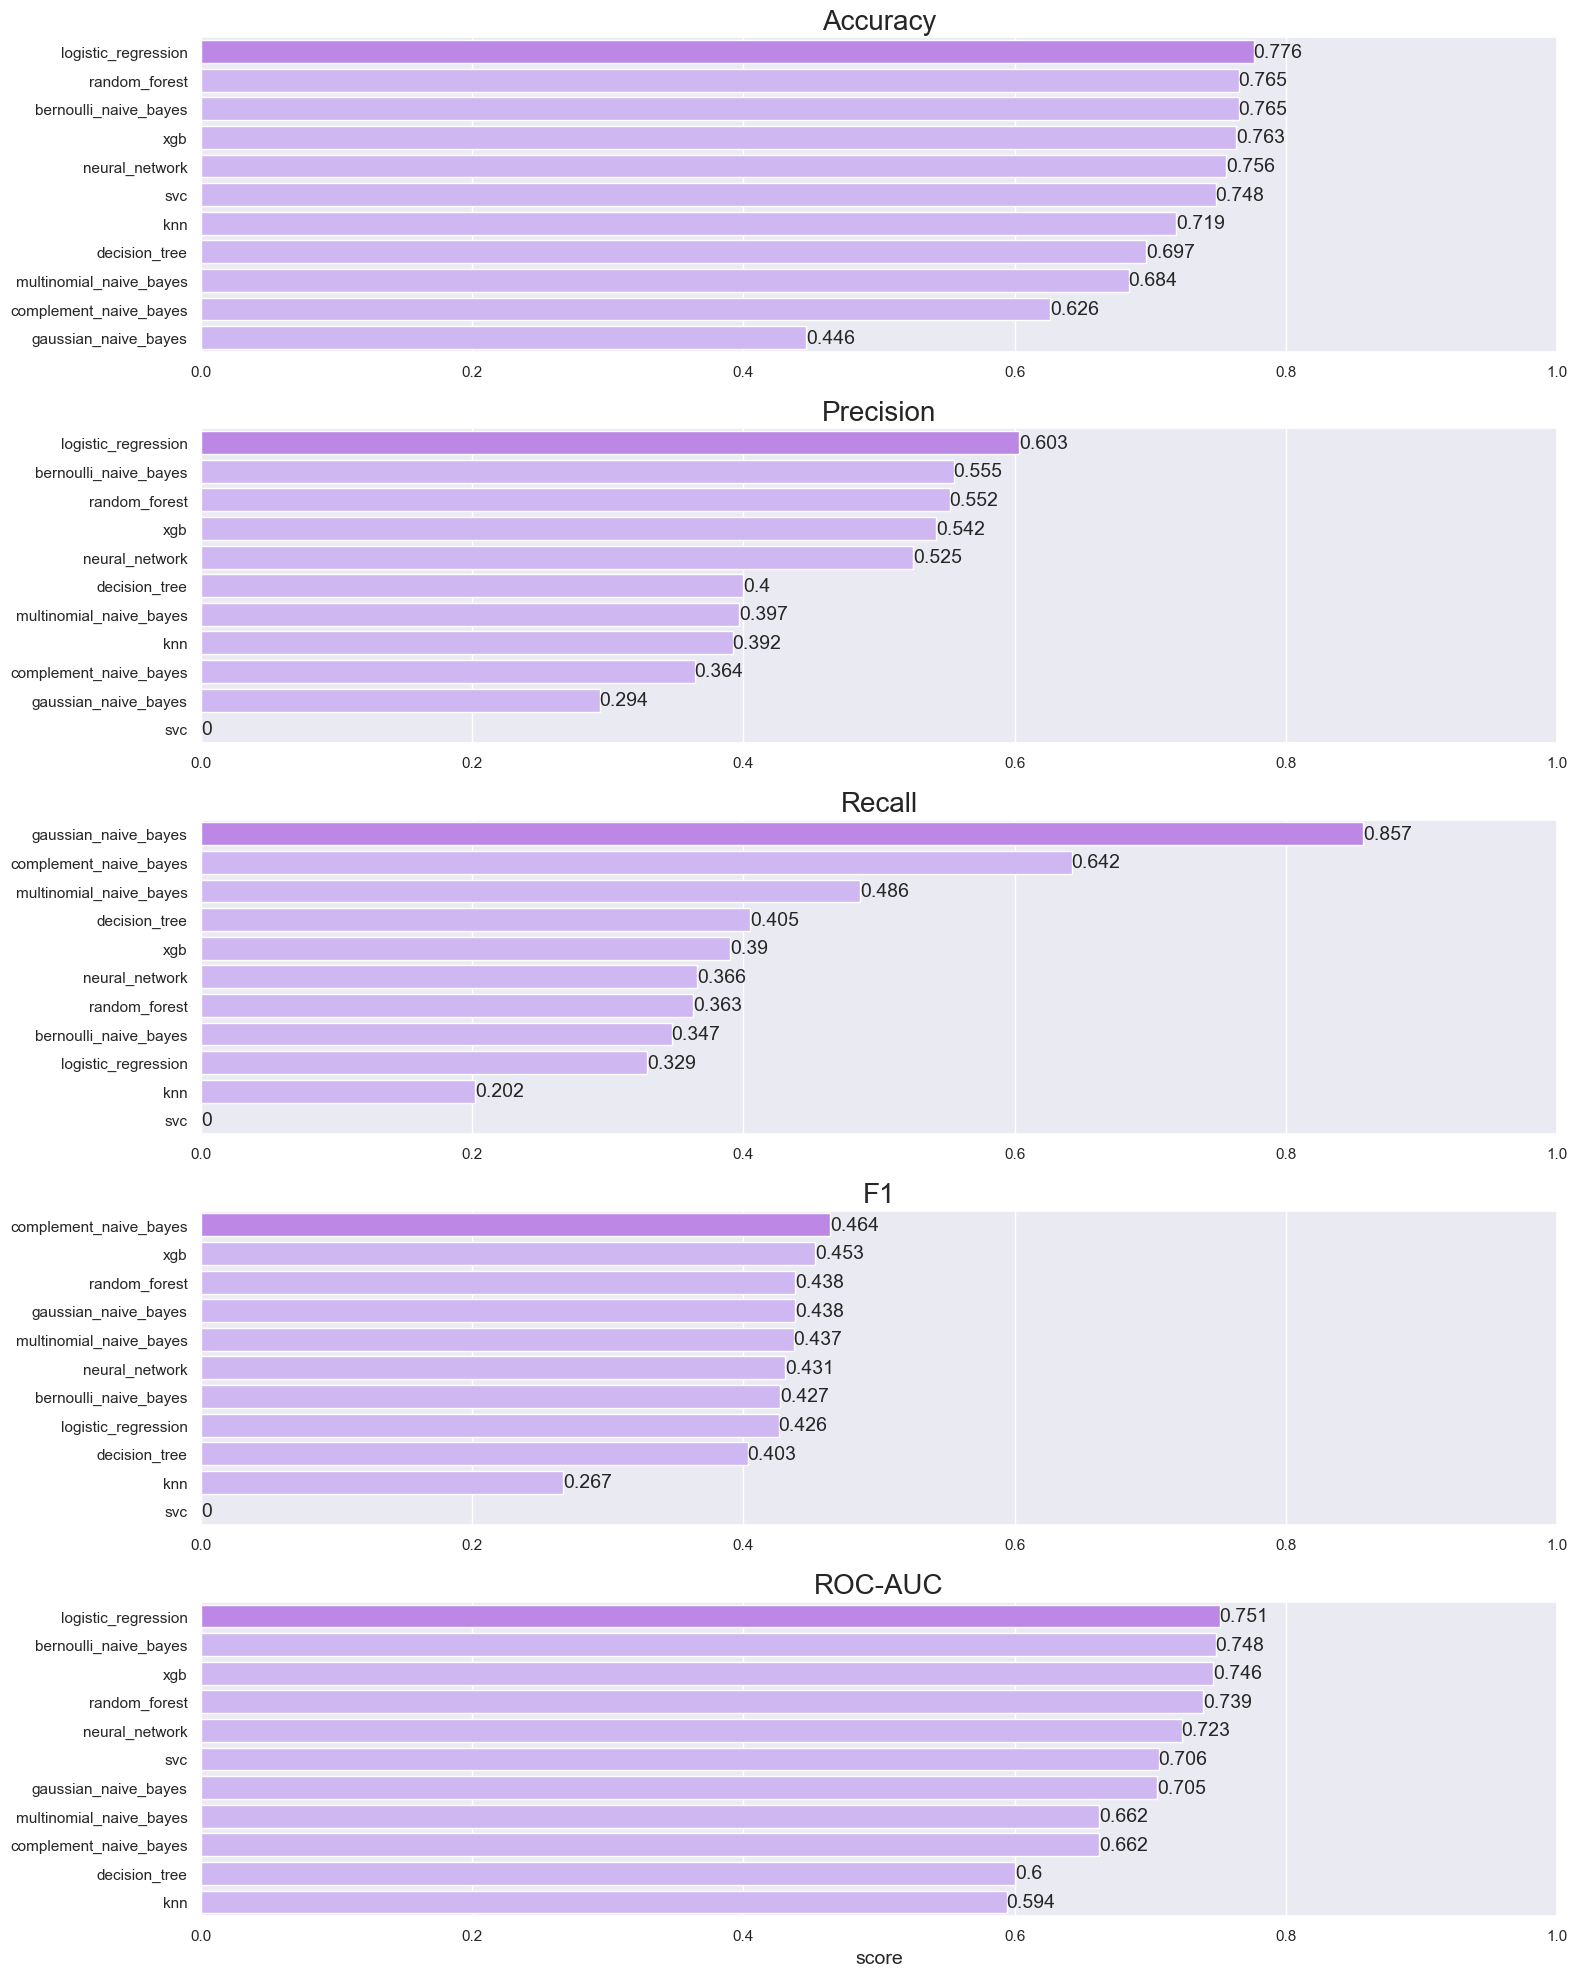

In [45]:
compareModelPlot(compareModelBy, figsize=(16,20))

## **ROC-AUC Curve**

In [48]:
from sklearn.metrics import roc_curve
def rocAucCurve(xTrain, yTrain, xTest, yTest, models):
    rocAucData = []
    for key, value in models.items():
        model = value.fit(xTrain,yTrain)
        yTestPredProb = model.predict_proba(xTest)[:,1]
        falsePositiveRate, truePositiveRate, threshold = roc_curve(yTest, yTestPredProb)
        rocAucData.append({
            'model': key,
            'FPR': falsePositiveRate,
            'TPR': truePositiveRate
        })
    f, ax = plt.subplots(nrows=1, ncols=len(rocAucData), figsize=(4*len(rocAucData), 4))
    for idx, value in enumerate(rocAucData): 
        sns.lineplot(ax=ax[idx], x=value['FPR'], y=value['TPR'], color='xkcd:light purple')
        ax[idx].set(title='ROC-AUC Curve {}'.format(value['model']), ylabel='True Positive Rate', xlabel='False Positive Rate')
        ax[idx].fill_between(value['FPR'], value['TPR'], alpha=0.5, color='xkcd:pale violet')
    plt.tight_layout()
    return plt.show()

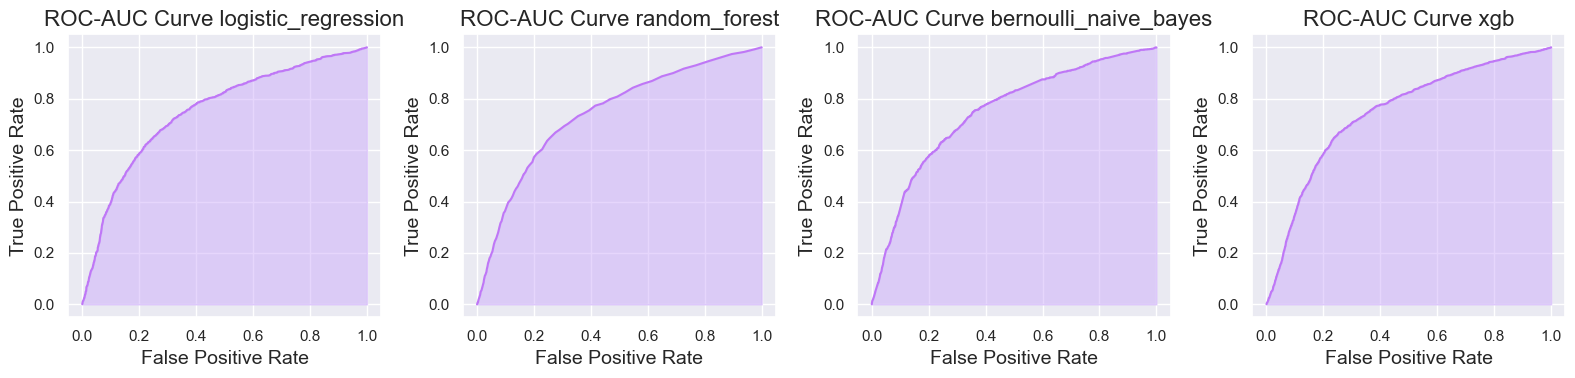

In [51]:
bestModel = {
    'logistic_regression': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
    'bernoulli_naive_bayes': BernoulliNB(),
    'xgb': XGBClassifier(objective ='reg:squarederror')
    # 'neural_network': MLPClassifier(), # terlalu slow --> butuh spek tinggi
}
rocAucCurve(xTrain, yTrain, xTest, yTest, bestModel)

## **Learning Curve - Overfit Test**

In [99]:
from sklearn.metrics import log_loss

def learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, model, start=200, steps=300):
    trainLoss, testLoss = [], []
    for value in np.arange(start,len(xTrain),steps):
        model.fit(xTrain.iloc[:value,:], yTrain[:value])
        yTrainPredProb = model.predict_proba(xTrain.iloc[:value,:])
        trainLoss.append(log_loss(yTrain[:value], yTrainPredProb))
        yTestPredProb = model.predict_proba(xTest)
        testLoss.append(log_loss(yTest, yTestPredProb))
    return [trainLoss, testLoss]

def learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, model, start=200, steps=300):
    trainAucRoc, testAucRoc = [], []
    for value in np.arange(start,len(xTrain),steps):
        model.fit(xTrain.iloc[:value,:], yTrain[:value])
        yTrainPredProb = model.predict_proba(xTrain.iloc[:value,:])
        trainAucRoc.append(roc_auc_score(yTrain[:value], yTrainPredProb[:,1]))
        yTestPredProb = model.predict_proba(xTest)
        testAucRoc.append(roc_auc_score(yTest, yTestPredProb[:,1]))
    return [trainAucRoc, testAucRoc]

def learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, model, start=200, steps=300):
    trainPrecision, testPrecision = [], []
    for value in np.arange(start,len(xTrain),steps):
        model.fit(xTrain.iloc[:value,:], yTrain[:value])
        yTrainPredProb = model.predict(xTrain.iloc[:value,:])
        trainPrecision.append(precision_score(yTrain[:value], yTrainPredProb))
        yTestPredProb = model.predict(xTest)
        testPrecision.append(precision_score(yTest, yTestPredProb))
    return [trainPrecision, testPrecision]

def learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, model, start=200, steps=300):
    trainAcc, testAcc = [], []
    for value in np.arange(start,len(xTrain),steps):
        model.fit(xTrain.iloc[:value,:], yTrain[:value])
        yTrainPredProb = model.predict(xTrain.iloc[:value,:])
        trainAcc.append(accuracy_score(yTrain[:value], yTrainPredProb))
        yTestPredProb = model.predict(xTest)
        testAcc.append(accuracy_score(yTest, yTestPredProb))
    return [trainAcc, testAcc]


def plotLearningCurve(data, labels, color1='xkcd:pale violet', color2='xkcd:light purple', lw=4, xLabel='Number of Training Labels', yLabel='', ylim=[0,1]):
    f, ax = plt.subplots(nrows=1, ncols=len(data), figsize=(5*len(data), 5))
    count = 0
    for key, value in data.items():
        plt.subplot2grid((1, len(data)), ((0, count)))
        sns.lineplot(data=value[0], label=labels[0], color=color1, lw=lw)
        sns.lineplot(data=value[1], label=labels[1], color=color2, lw=lw)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.ylim(ylim)
        plt.title('Learning Curve - {}'.format(key))
        count = count + 1
    plt.tight_layout()
    return plt.show()

In [67]:
learningCurveLossLR = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, bestModel['logistic_regression'])
learningCurveLossBNB = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, bestModel['bernoulli_naive_bayes'])
learningCurveLossRF = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, bestModel['random_forest'])
learningCurveLossXGB = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, bestModel['xgb'])

In [102]:
learningCurveAucRocLR = learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, bestModel['logistic_regression'])
learningCurveAucRocBNB = learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, bestModel['bernoulli_naive_bayes'])
learningCurveAucRocRF = learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, bestModel['random_forest'])
learningCurveAucRocXGB = learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, bestModel['xgb'])

In [103]:
learningCurvePrecisionLR = learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, bestModel['logistic_regression'])
learningCurvePrecisionBNB = learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, bestModel['bernoulli_naive_bayes'])
learningCurvePrecisionRF = learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, bestModel['random_forest'])
learningCurvePrecisionXGB = learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, bestModel['xgb'])

In [104]:
learningCurveAccLR = learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, bestModel['logistic_regression'])
learningCurveAccBNB = learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, bestModel['bernoulli_naive_bayes'])
learningCurveAccRF = learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, bestModel['random_forest'])
learningCurveAccXGB = learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, bestModel['xgb'])

In [105]:
learningCurveDataLoss = {
  'logistic_regression': learningCurveLossLR,
  'bernoulli_naive_bayes': learningCurveLossBNB,
  'random_forest': learningCurveLossRF,
  'xgb': learningCurveLossXGB
}
learningCurveDataAucRoc = {
  'logistic_regression': learningCurveAucRocLR,
  'bernoulli_naive_bayes': learningCurveAucRocBNB,
  'random_forest': learningCurveAucRocRF,
  'xgb': learningCurveAucRocXGB
}
learningCurveDataPrecision = {
  'logistic_regression': learningCurvePrecisionLR,
  'bernoulli_naive_bayes': learningCurvePrecisionBNB,
  'random_forest': learningCurvePrecisionRF,
  'xgb': learningCurvePrecisionXGB
}
learningCurveDataAcc = {
  'logistic_regression': learningCurveAccLR,
  'bernoulli_naive_bayes': learningCurveAccBNB,
  'random_forest': learningCurveAccRF,
  'xgb': learningCurveAccXGB
}

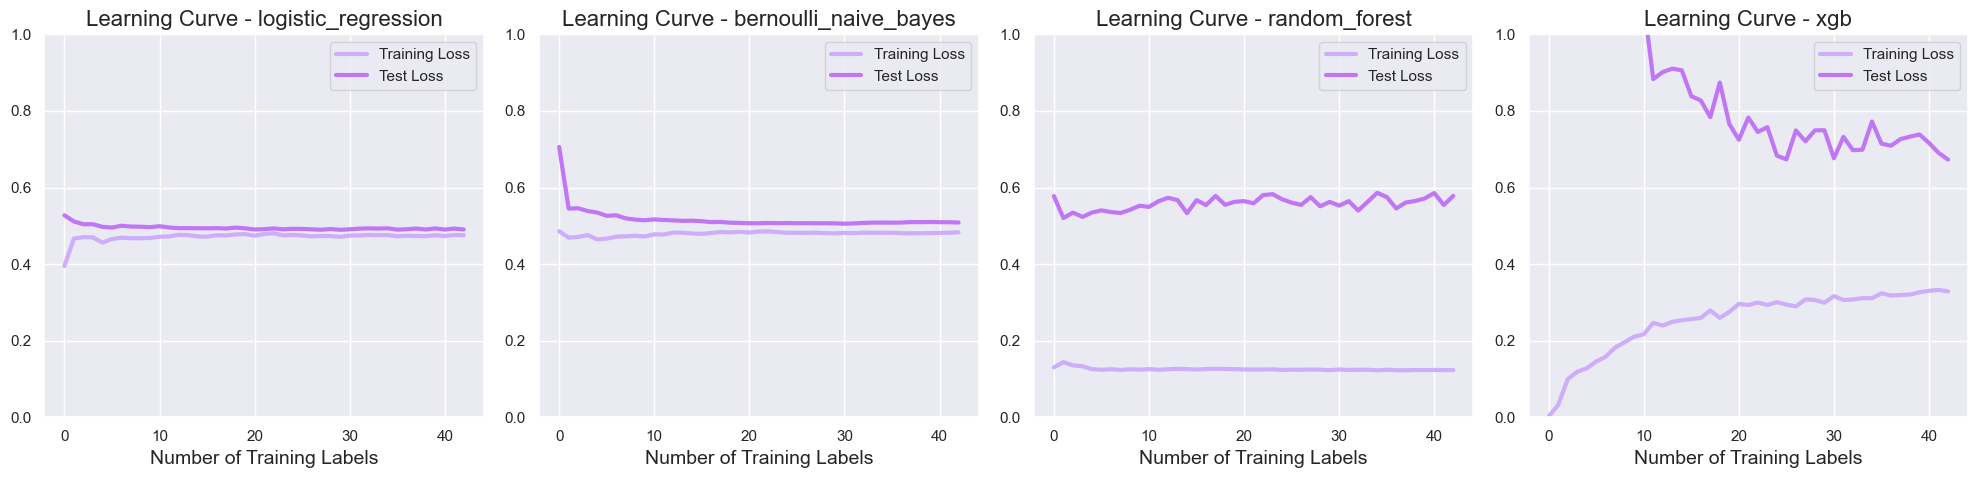

In [101]:
plotLearningCurve(learningCurveDataLoss, labels=['Training Loss', 'Test Loss'], lw=3)

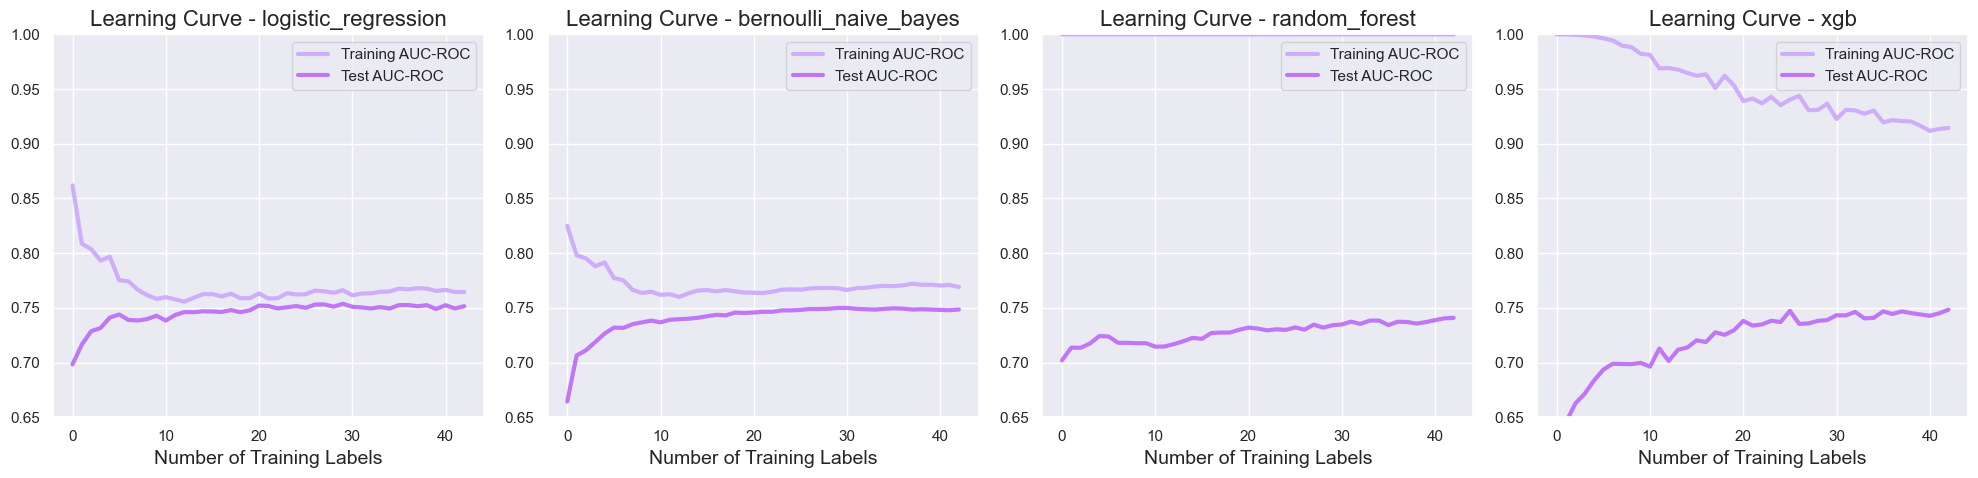

In [113]:
plotLearningCurve(learningCurveDataAucRoc, labels=['Training AUC-ROC', 'Test AUC-ROC'], lw=3, ylim=[0.65, 1])

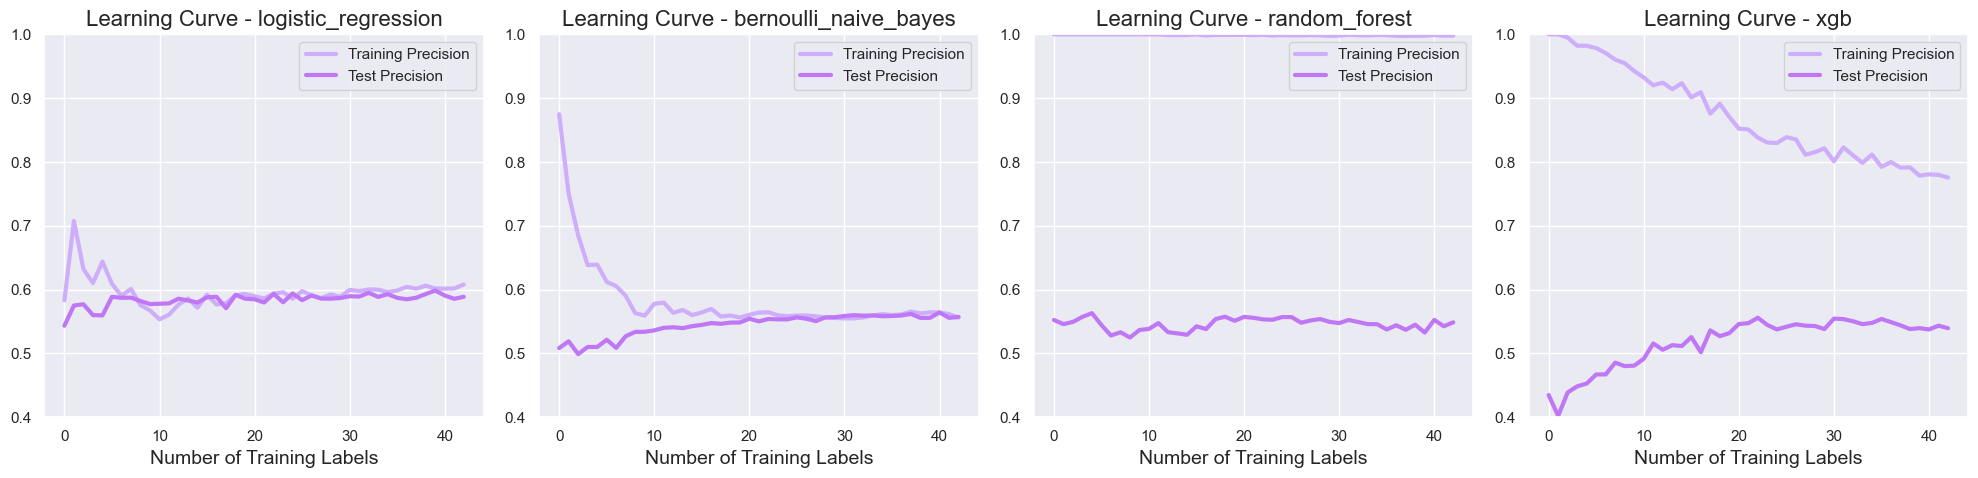

In [110]:
plotLearningCurve(learningCurveDataPrecision, labels=['Training Precision', 'Test Precision'], lw=3, ylim=[0.4, 1])

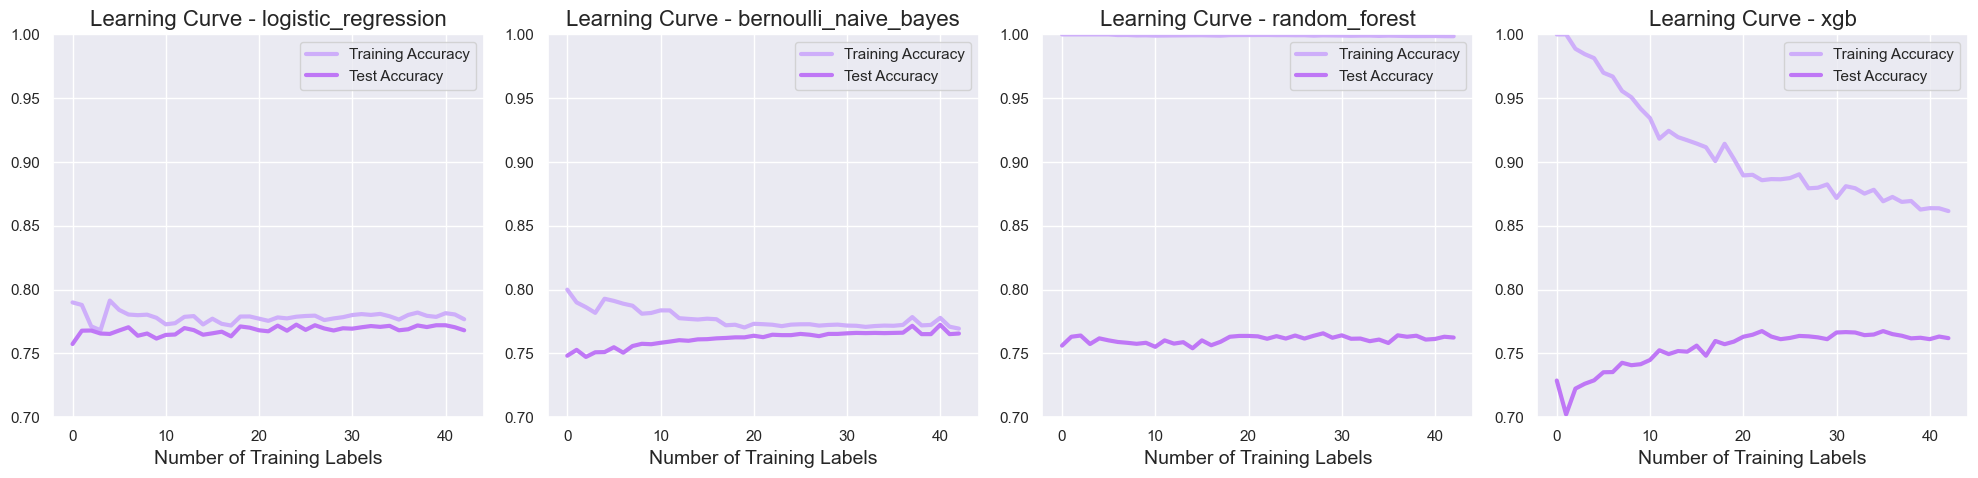

In [111]:
plotLearningCurve(learningCurveDataAcc, labels=['Training Accuracy', 'Test Accuracy'], lw=3, ylim=[0.7, 1])

## **Coclusion**
Metrics yang cocok untuk jadi acuan pertimbangan dalam kasus yang menentukan karyawan resign atau tidak adalah Precision dan ROC-AUC. Karena memprediksikan karyawan resign yang pada kenyataannya tidak resign (FP) lebih baik dibanding hal sebaliknya. Kemudian ROC-AUC digunakan untuk melihat kemampuan dan ketepatan model dalam membedakan class target variable. Pada kasus ini algoritma terbaik adalah:

- logistic_regression
- bernoulli_naive_bayes
- random_forest
- XGB
- neural_network (memerlukan resource besar (spek tinggi))

Dari chart Learning Curve dapat disimpulkan bahwa logistic_regression dan bernoulli_naive_bayes memiliki performa lebih baik, dengan logistic_regression yang terbaik. Sedangkan pada random_forest dan xgb menunjukkan model mengalami overfitting.

# **MODEL TUNING**

In [783]:
dataTuning = data.copy()
dataTuning.rename(columns={'relevent_experience': 'relevant_experience'}, inplace=True)
dataTuning.drop(['enrollee_id'], axis=1, inplace=True)
#
dataTuning = toCleanString(dataTuning, catColumns)
dataTuning.company_size = np.where(dataTuning.company_size=='10/49', '10-49', np.where(dataTuning.company_size=='10000+', '>10000', dataTuning.company_size))
#
catColumns = [x for x in dataTuning.columns if dataTuning[x].dtype == 'object']
labelColumns = []
oheColumns = []
for value in catColumns:
  if value in ['city', 'gender', 'major_discipline', 'company_type']:
    oheColumns.append(value)
  else: labelColumns.append(value)
# label encoding
dataTuning = toOrdinalEncoding(dataTuning, catColumns, mappingLabel)
# one-hot encoding nnti setelah missing values
## label encoding sementara untuk handle missing value setelah itu akan di-inverse untuk OHE
leCity = LabelEncoder()
leGender = LabelEncoder()
leMajorDiscipline = LabelEncoder()
leCompanyType = LabelEncoder()
dataTuning.city = leCity.fit_transform(dataTuning.city)
dataTuning.gender = leGender.fit_transform(dataTuning.gender) 
dataTuning.major_discipline = leMajorDiscipline.fit_transform(dataTuning.major_discipline) 
dataTuning.company_type = leCompanyType.fit_transform(dataTuning.company_type)
## label to nan
dataTuning.gender = np.where(dataTuning.gender==len(leGender.classes_)-1, np.nan, dataTuning.gender)
dataTuning.city = np.where(dataTuning.city==len(leCity.classes_)-1, np.nan, dataTuning.city)
dataTuning.major_discipline = np.where(dataTuning.major_discipline==len(leMajorDiscipline.classes_)-1, np.nan, dataTuning.major_discipline)
dataTuning.company_type = np.where(dataTuning.company_type==len(leCompanyType.classes_)-1, np.nan, dataTuning.company_type)
#
numOfNeighbors = 5
numericalColumns = ['city_development_index','training_hours','target']
knnImputer = KNNImputer(n_neighbors=numOfNeighbors)
dataCategorical = dataTuning[[x for x in dataTuning.columns if x not in numericalColumns]]
dataCategoricalNonMissing = knnImputer.fit_transform(dataCategorical)
dataTuningCategoricalNonMissing = pd.DataFrame(np.intc(np.round(dataCategoricalNonMissing)), columns=dataCategorical.columns)
dataTuning = pd.concat([dataTuning[numericalColumns], dataTuningCategoricalNonMissing], axis=1)
#
dataTuning.city = leCity.inverse_transform(dataTuning.city)
dataTuning.gender = leGender.inverse_transform(dataTuning.gender)
dataTuning.major_discipline = leMajorDiscipline.inverse_transform(dataTuning.major_discipline)
dataTuning.company_type = leCompanyType.inverse_transform(dataTuning.company_type)
# OHE
dataTuning = toOhe(data=dataTuning, cols=oheColumns)
dataTuning

,city_development_index,training_hours,target,relevant_experience,enrolled_university,education_level,experience,company_size,last_new_job,city_city1,...,major_discipline_humanities,major_discipline_nomajor,major_discipline_other,major_discipline_stem,company_type_earlystagestartup,company_type_fundedstartup,company_type_ngo,company_type_other,company_type_publicsector,company_type_pvtltd
0,0.920,36,1.0,1,0,2,21,4,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.776,47,0.0,0,0,2,15,2,5,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.624,83,0.0,0,2,2,5,2,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.789,52,1.0,0,1,2,0,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.767,8,0.0,1,0,3,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,1.0,0,0,2,14,3,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19154,0.920,52,1.0,1,0,2,14,3,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19155,0.920,44,0.0,1,0,2,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19156,0.802,97,0.0,1,0,1,0,4,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## **Feature Scaling**

In [784]:
from sklearn.preprocessing import MinMaxScaler

def minMaxScalerFunc(data, cols):
  for value in cols:
    data[value] = MinMaxScaler().fit_transform(data[[value]])
  return data

In [785]:
dataTuningScaling = dataTuning.copy()
dataTuningScaling = minMaxScalerFunc(dataTuning, ['training_hours'])
dataTuningScaling

,city_development_index,training_hours,target,relevant_experience,enrolled_university,education_level,experience,company_size,last_new_job,city_city1,...,major_discipline_humanities,major_discipline_nomajor,major_discipline_other,major_discipline_stem,company_type_earlystagestartup,company_type_fundedstartup,company_type_ngo,company_type_other,company_type_publicsector,company_type_pvtltd
0,0.920,0.104478,1.0,1,0,2,21,4,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.776,0.137313,0.0,0,0,2,15,2,5,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.624,0.244776,0.0,0,2,2,5,2,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.789,0.152239,1.0,0,1,2,0,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.767,0.020896,0.0,1,0,3,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0.122388,1.0,0,0,2,14,3,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19154,0.920,0.152239,1.0,1,0,2,14,3,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19155,0.920,0.128358,0.0,1,0,2,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19156,0.802,0.286567,0.0,1,0,1,0,4,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [788]:
x1 = dataTuningScaling.drop(['target'], axis=1)
y1 = dataTuningScaling.target
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(x1, y1, test_size=testSize, random_state=randomState) 
models1 = {
    'logistic_regression': LogisticRegression(),
    'bernoulli_naive_bayes': BernoulliNB()
}
compareModelScaling = compareBestModelFunc(xTrain1, yTrain1, xTest1, yTest1, models1)

In [792]:
compareModel_ = compareModel[compareModel.algorithm.isin(['logistic_regression','bernoulli_naive_bayes'])].copy()
compareModel_['type'] = compareModel_.algorithm + ' (original)'
compareModelScaling['type'] = compareModelScaling.algorithm + ' (scaling)'
compareBestModel = pd.concat([compareModel_, compareModelScaling]).reset_index(drop=True)
compareBestModel

,algorithm,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,type
0,logistic_regression,0.776,0.603,0.329,0.426,0.751,logistic_regression (original)
1,bernoulli_naive_bayes,0.765,0.555,0.347,0.427,0.748,bernoulli_naive_bayes (original)
2,logistic_regression,0.773,0.585,0.351,0.439,0.761,logistic_regression (scaling)
3,bernoulli_naive_bayes,0.764,0.548,0.362,0.436,0.750,bernoulli_naive_bayes (scaling)


## **Feature Transform Scaling**

### **Box-Cox**
All the values of lambda vary from -5 to 5 are considered and the best value for the data is selected. The “Best” value is one that results in the best skewness of the distribution. Log transformation will take place when we have lambda is zero.
- engga bisa buat 0 values

In [807]:
from scipy.stats import boxcox

def toBoxCoxScaling(data, cols):
  for value in cols:
    data[value], lamb = boxcox(data[value])
  return data

### **Log**
Log transformation is a data transformation method in which in which each variable of x will be replaced by log(x) with base 10, base 2, or natural log.. The choice of the logarithm base is usually left up to the analyst and it would depend on the purposes of statistical modeling When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. The important caveat here is that the original data has to follow or approximately follow a log-normal distribution. Otherwise, the log transformation won’t work.

In [824]:
def toLogScaling(data, cols):
  for value in cols:
    data[value] = np.log1p(data[value])
  return data

In [825]:
dataTuningTS1 = dataTuningScaling.copy()
dataTuningTS1 = toLogScaling(dataTuningTS1, ['training_hours', 'city_development_index'])
dataTuningTS1

,city_development_index,training_hours,target,relevant_experience,enrolled_university,education_level,experience,company_size,last_new_job,city_city1,...,major_discipline_humanities,major_discipline_nomajor,major_discipline_other,major_discipline_stem,company_type_earlystagestartup,company_type_fundedstartup,company_type_ngo,company_type_other,company_type_publicsector,company_type_pvtltd
0,0.652325,0.099372,1.0,1,0,2,21,4,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.574364,0.128669,0.0,0,0,2,15,2,5,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.484892,0.218956,0.0,0,2,2,5,2,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.581657,0.141707,1.0,0,1,2,0,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.569283,0.020680,0.0,1,0,3,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.630207,0.115459,1.0,0,0,2,14,3,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19154,0.652325,0.141707,1.0,1,0,2,14,3,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19155,0.652325,0.120764,0.0,1,0,2,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19156,0.588897,0.251978,0.0,1,0,1,0,4,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### **Yeo-Johnson**
This is one of the older transformation technique which is very similar to Box-cox transformation but does not require the values to be strictly positive. This transformation is also having the ability to make the distribution more symmetric.

In [830]:
from scipy.stats import yeojohnson

def toYeoJohnsonScaling(data, cols):
  for value in cols:
    data[value], lamb = yeojohnson(data[value])
  return data

In [831]:
dataTuningTS2 = dataTuningScaling.copy()
dataTuningTS2 = toYeoJohnsonScaling(dataTuningTS2, ['training_hours', 'city_development_index'])
dataTuningTS2

,city_development_index,training_hours,target,relevant_experience,enrolled_university,education_level,experience,company_size,last_new_job,city_city1,...,major_discipline_humanities,major_discipline_nomajor,major_discipline_other,major_discipline_stem,company_type_earlystagestartup,company_type_fundedstartup,company_type_ngo,company_type_other,company_type_publicsector,company_type_pvtltd
0,428.390539,0.081189,1.0,1,0,2,21,4,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,152.414580,0.099319,0.0,0,0,2,15,2,5,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46.518156,0.142982,0.0,0,2,2,5,2,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,167.887762,0.106695,1.0,0,1,2,0,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,142.486310,0.019805,0.0,1,0,3,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,319.539157,0.091420,1.0,0,0,2,14,3,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19154,428.390539,0.106695,1.0,1,0,2,14,3,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19155,428.390539,0.094645,0.0,1,0,2,21,2,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19156,184.801595,0.155233,0.0,1,0,1,0,4,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot: xlabel='city_development_index', ylabel='Count'>

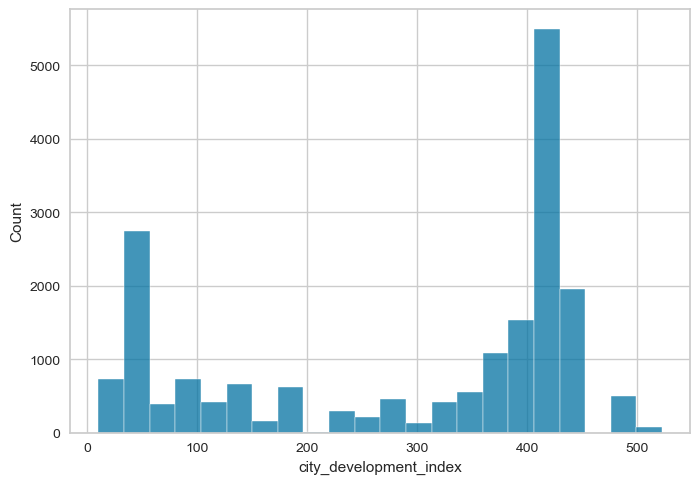

In [832]:
sns.histplot(x=dataTuningTS2.city_development_index)

<AxesSubplot: xlabel='city_development_index', ylabel='Count'>

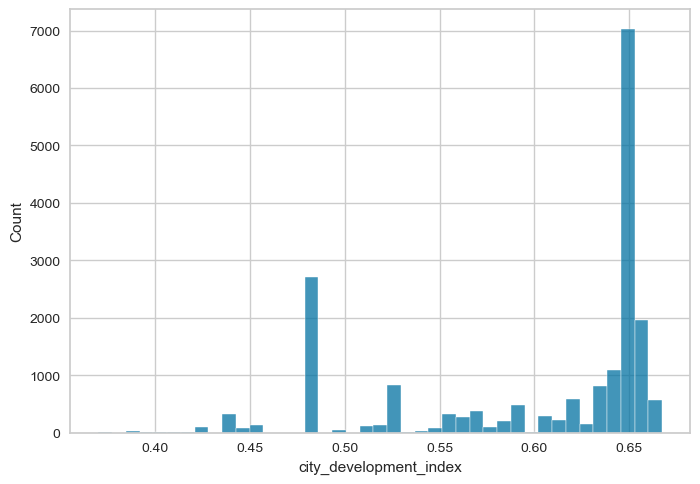

In [828]:
sns.histplot(x=dataTuningTS1.city_development_index)

<AxesSubplot: xlabel='training_hours', ylabel='Count'>

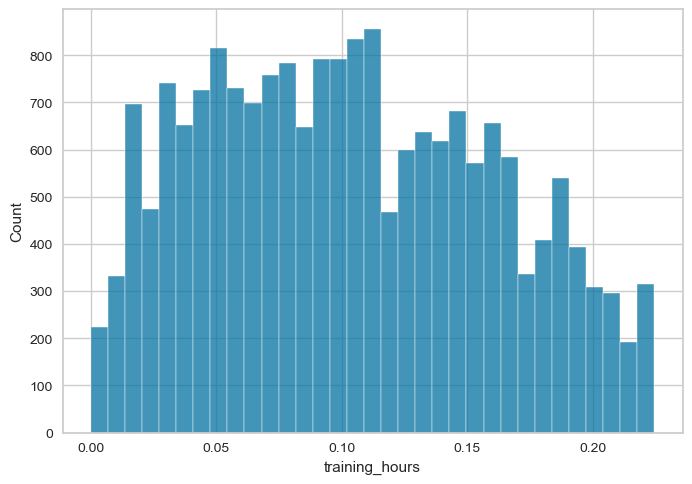

In [833]:
sns.histplot(x=dataTuningTS2.training_hours)

<AxesSubplot: xlabel='training_hours', ylabel='Count'>

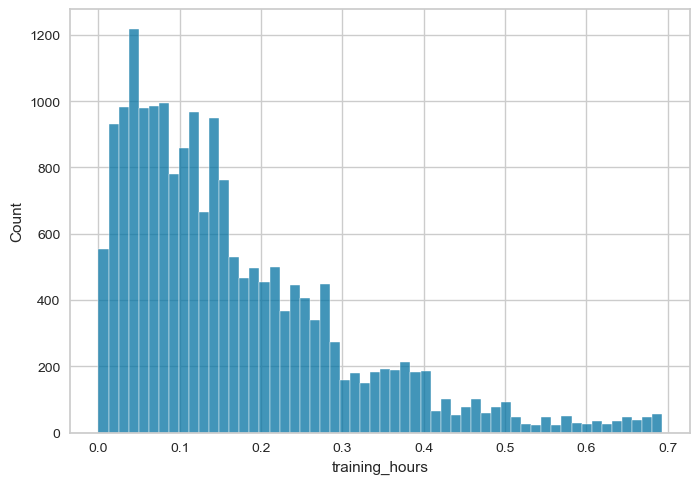

In [826]:
sns.histplot(x=dataTuningTS1.training_hours)

<AxesSubplot: xlabel='city_development_index', ylabel='Count'>

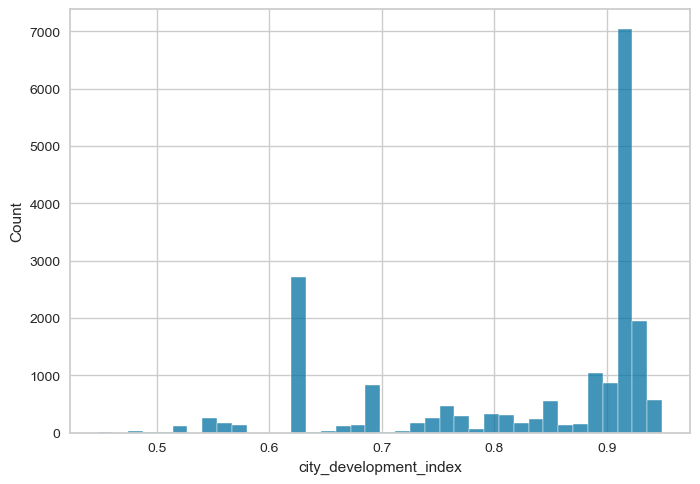

In [827]:
sns.histplot(x=dataTuningScaling.city_development_index)

<AxesSubplot: xlabel='training_hours', ylabel='Count'>

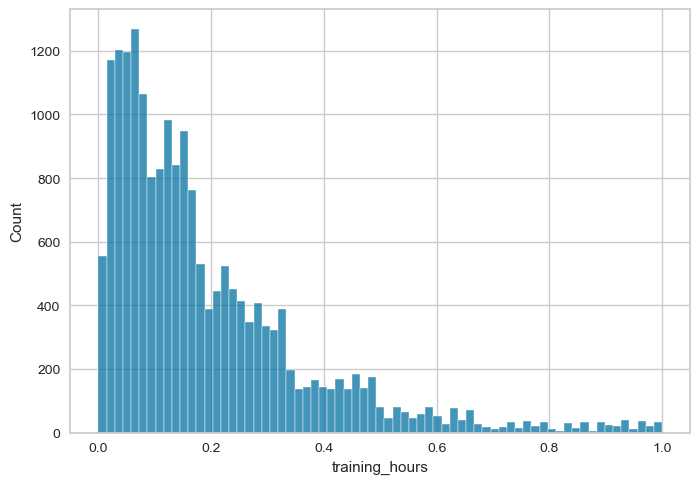

In [804]:
sns.histplot(x=dataTuningScaling.training_hours)